#### Library Import

In [1]:
!pip install catboost
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scipy
!pip install scikit-learn
!pip install xgboost
!pip install tensorflow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import anderson
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Load the dataste

In [2]:
kepler = pd.read_csv('keplerData.csv')
kepler.head()

kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2  10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
3  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...  \
0      1.000              0              0              0              0  ...   
1      0.969              0              0              0              0  ...   
2      0.000              0              0              0              0  ...   
3      0.000              0              1              0              0  ...   
4      1.000              0              0              0              0  ...   

   koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  koi_srad_err1  \
0      4.467           0.064          -0.096     0.927          0.105   
1      4.467           0.064          -0.096     0.927          0.105   
2      4.544           0.044          -0.176     0.868          0.233   
3      4.564           0.053          -0.168     0.791          0.201   
4      4.438           0.070          -0.210     1.046          0.334   

   koi_srad_err2        ra_str       dec_str  koi_kepmag  koi_kepmag_err  
0         -0.061  19h27m44.22s  +48d08m29.9s      15.347             NaN  
1         -0.061  19h27m44.22s  +48d08m29.9s      15.347             NaN  
2         -0.078  19h48m01.16s  +48d08m02.9s      15.436             NaN  
3         -0.067  19h02m08.31s  +48d17m06.8s      15.597             NaN  
4         -0.133  19h15m01.17s  +48d13m34.3s      15.509             NaN  

[5 rows x 50 columns]

In [3]:
kepler.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra_str', 'dec_str', 'koi_kepmag',
       'koi_kepmag_err'],
      dtype='object')

In [4]:
kepler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2743 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [5]:
kepler.drop(['kepid','kepoi_name','kepler_name','koi_pdisposition','koi_score'], axis=1, inplace=True)

#### Exploratory Data Analysis

koi_disposition is the output variable.

koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2741
CANDIDATE         1984
Name: count, dtype: int64


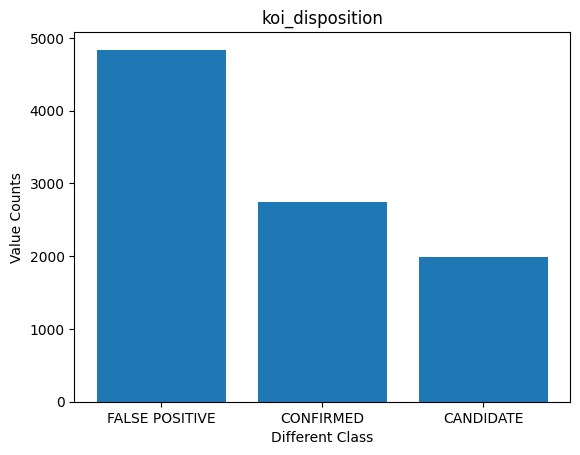

In [6]:
classes=kepler.koi_disposition.unique()
counts = kepler.koi_disposition.value_counts().to_list()
labels = ['FALSE POSITIVE','CONFIRMED', 'CANDIDATE']
plt.bar(labels,counts)
plt.title('koi_disposition')
plt.xlabel('Different Class')
plt.ylabel('Value Counts')
print(kepler.koi_disposition.value_counts())

As I will work with FALSE POSITIVE and CONFIRMED values so, CANDIADTE is not important for my porject.

Confirmed count after imputation: 2741
False Positive count after imputation: 4839


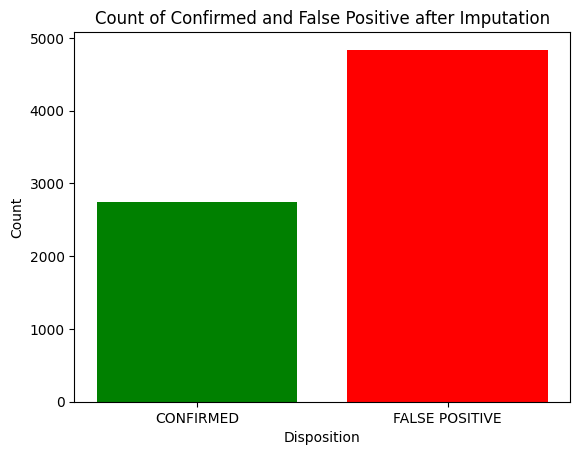

In [7]:
# Drop rows where koi_disposition is 'CANDIDATE'
kepler = kepler[kepler['koi_disposition'] != 'CANDIDATE']

confirmed_count_after_imputation = kepler[kepler['koi_disposition'] == 'CONFIRMED'].shape[0]
false_positive_count_after_imputation = kepler[kepler['koi_disposition'] == 'FALSE POSITIVE'].shape[0]

print("Confirmed count after imputation:", confirmed_count_after_imputation)
print("False Positive count after imputation:", false_positive_count_after_imputation)

# Plotting the counts
counts = [confirmed_count_after_imputation, false_positive_count_after_imputation]
labels = ['CONFIRMED', 'FALSE POSITIVE']
#plt.figure(figsize=(6, 5))
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.title('Count of Confirmed and False Positive after Imputation')
plt.show()

In [8]:
# Check for missing values
print("\nMissing Values:")
print(kepler.isnull().sum())


Missing Values:
koi_disposition         0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       338
koi_period_err2       338
koi_time0bk             0
koi_time0bk_err1      338
koi_time0bk_err2      338
koi_impact            259
koi_impact_err1       338
koi_impact_err2       338
koi_duration            0
koi_duration_err1     338
koi_duration_err2     338
koi_depth             259
koi_depth_err1        338
koi_depth_err2        338
koi_prad              259
koi_prad_err1         259
koi_prad_err2         259
koi_teq               259
koi_teq_err1         7580
koi_teq_err2         7580
koi_insol             219
koi_insol_err1        219
koi_insol_err2        219
koi_model_snr         259
koi_tce_plnt_num      286
koi_tce_delivname     286
koi_steff             259
koi_steff_err1        358
koi_steff_err2        373
koi_slogg             259
koi_slogg_err1        358
koi_slogg_err2       

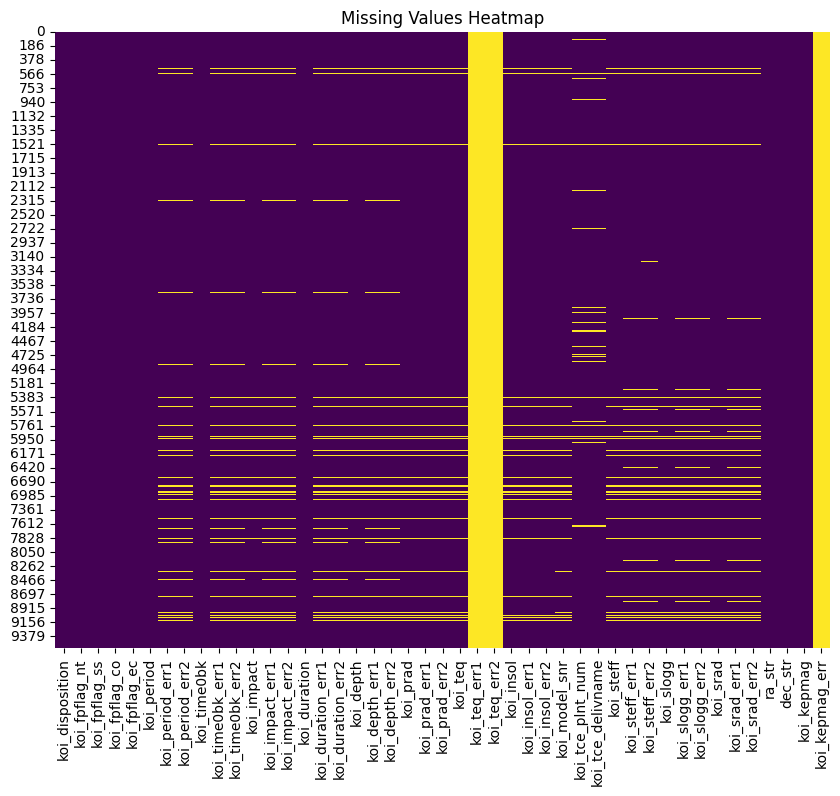

In [9]:
# Visualize missing values
plt.figure(figsize=(10, 8))
sns.heatmap(kepler.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
# Rounding the values to two decimal places and presenting the top 30 columns with the highest percentage of missing values.
pd.DataFrame(round((kepler.isnull().sum() * 100/ len(kepler)),2).sort_values(ascending=False)).head(30)

0
koi_kepmag_err     100.00
koi_teq_err2       100.00
koi_teq_err1       100.00
koi_steff_err2       4.92
koi_slogg_err1       4.72
koi_steff_err1       4.72
koi_srad_err2        4.72
koi_srad_err1        4.72
koi_slogg_err2       4.72
koi_period_err2      4.46
koi_duration_err1    4.46
koi_depth_err2       4.46
koi_depth_err1       4.46
koi_time0bk_err1     4.46
koi_duration_err2    4.46
koi_impact_err2      4.46
koi_period_err1      4.46
koi_time0bk_err2     4.46
koi_impact_err1      4.46
koi_tce_delivname    3.77
koi_tce_plnt_num     3.77
koi_srad             3.42
koi_slogg            3.42
koi_steff            3.42
koi_model_snr        3.42
koi_prad_err2        3.42
koi_impact           3.42
koi_prad             3.42
koi_teq              3.42
koi_depth            3.42

In [11]:
# Dropping columns with more than 80% missing values
kepler = kepler.dropna(thresh=len(kepler) * 0.20, axis=1)
print("\nAfter dropping columns with > 80% missing values:")
print(kepler.info())


After dropping columns with > 80% missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 7580 entries, 0 to 9563
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    7580 non-null   object 
 1   koi_fpflag_nt      7580 non-null   int64  
 2   koi_fpflag_ss      7580 non-null   int64  
 3   koi_fpflag_co      7580 non-null   int64  
 4   koi_fpflag_ec      7580 non-null   int64  
 5   koi_period         7580 non-null   float64
 6   koi_period_err1    7242 non-null   float64
 7   koi_period_err2    7242 non-null   float64
 8   koi_time0bk        7580 non-null   float64
 9   koi_time0bk_err1   7242 non-null   float64
 10  koi_time0bk_err2   7242 non-null   float64
 11  koi_impact         7321 non-null   float64
 12  koi_impact_err1    7242 non-null   float64
 13  koi_impact_err2    7242 non-null   float64
 14  koi_duration       7580 non-null   float64
 15  koi_duration_err1  7242 no

In [12]:
# imputing missing values for columns with less than 80% missing values
for column in kepler.columns:
    if kepler[column].isnull().sum() > 0:
        if kepler[column].dtype == 'object':
            # Fill with mode for categorical columns
            kepler[column].fillna(kepler[column].mode()[0], inplace=True)
        else:
            # Fill with mean for numerical columns
            kepler[column].fillna(kepler[column].mean(), inplace=True)

In [13]:
# Check dataset info after filling missing values
print("\nAfter filling missing values:")
print(kepler.info())


After filling missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 7580 entries, 0 to 9563
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    7580 non-null   object 
 1   koi_fpflag_nt      7580 non-null   int64  
 2   koi_fpflag_ss      7580 non-null   int64  
 3   koi_fpflag_co      7580 non-null   int64  
 4   koi_fpflag_ec      7580 non-null   int64  
 5   koi_period         7580 non-null   float64
 6   koi_period_err1    7580 non-null   float64
 7   koi_period_err2    7580 non-null   float64
 8   koi_time0bk        7580 non-null   float64
 9   koi_time0bk_err1   7580 non-null   float64
 10  koi_time0bk_err2   7580 non-null   float64
 11  koi_impact         7580 non-null   float64
 12  koi_impact_err1    7580 non-null   float64
 13  koi_impact_err2    7580 non-null   float64
 14  koi_duration       7580 non-null   float64
 15  koi_duration_err1  7580 non-null   float64
 16

In [14]:
# Count the number of each unique value in the koi_disposition column
value_counts = kepler['koi_disposition'].value_counts()

# Print the counts
print("Number of Confirmed and False Positive values:")
print(value_counts)
print(kepler.info())


Number of Confirmed and False Positive values:
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2741
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 7580 entries, 0 to 9563
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    7580 non-null   object 
 1   koi_fpflag_nt      7580 non-null   int64  
 2   koi_fpflag_ss      7580 non-null   int64  
 3   koi_fpflag_co      7580 non-null   int64  
 4   koi_fpflag_ec      7580 non-null   int64  
 5   koi_period         7580 non-null   float64
 6   koi_period_err1    7580 non-null   float64
 7   koi_period_err2    7580 non-null   float64
 8   koi_time0bk        7580 non-null   float64
 9   koi_time0bk_err1   7580 non-null   float64
 10  koi_time0bk_err2   7580 non-null   float64
 11  koi_impact         7580 non-null   float64
 12  koi_impact_err1    7580 non-null   float64
 13  koi_impact_err2    7580 non-null   flo

Number of Confirmed and False Positive values:
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2741
Name: count, dtype: int64


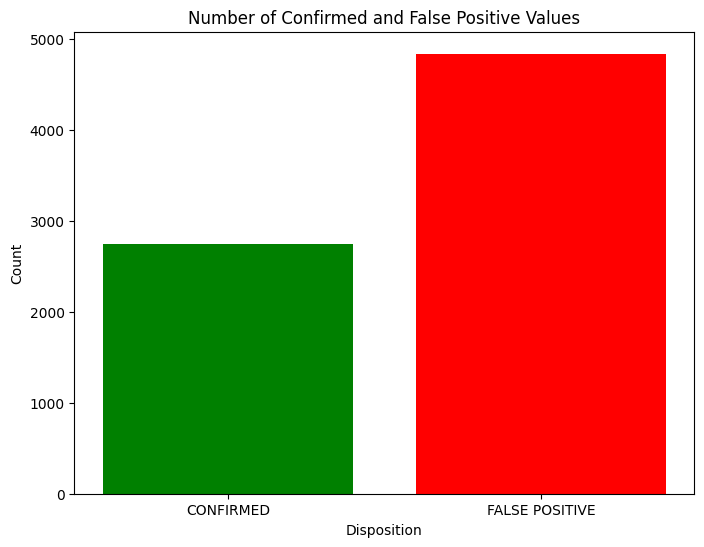

In [15]:
# Count the number of each unique value in the koi_disposition column
value_counts = kepler['koi_disposition'].value_counts()

# Print the counts
print("Number of Confirmed and False Positive values:")
print(value_counts)

labels = ['CONFIRMED', 'FALSE POSITIVE']
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['green', 'red'])
plt.title('Number of Confirmed and False Positive Values')
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.show()

In [16]:
# Check for missing values
print("\nMissing Values:")
print(kepler.isnull().sum())


Missing Values:
koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra_str               0
dec_str              0
koi_kepmag           0
dtype: int64


In [17]:
# Print the Numeric Columns
numList = list(kepler.select_dtypes(include=['int64', 'float64']).columns)
print(numList)
print("Total number of numeric columns:", len(numList))

['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'koi_kepmag']
Total number of numeric columns: 38


In [18]:
kepler.describe()

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
count    7580.000000    7580.000000    7580.000000    7580.000000   
mean        0.263061       0.293404       0.249208       0.151451   
std         5.353692       0.455352       0.432583       0.358512   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.000000       0.000000   
max       465.000000       1.000000       1.000000       1.000000   

        koi_period  koi_period_err1  koi_period_err2  koi_time0bk  \
count  7580.000000     7.580000e+03     7.580000e+03  7580.000000   
mean     51.626140     1.802205e-03    -1.802205e-03   162.399245   
std     111.826317     7.897591e-03     7.897591e-03    62.882521   
min       0.241843     1.100000e-08    -1.725000e-01   120.515914   
25%       2.243016     3.937500e-06    -2.131250e-04   132.553902   
50%       8.062325     2.485000e-05    -2.485000e-05   136.401784   
75%      30.501068     2.131250e-04    -3.937500e-06   169.915760   
max    1071.232624     1.725000e-01    -1.100000e-08  1472.522306   

       koi_time0bk_err1  koi_time0bk_err2  ...     koi_steff  koi_steff_err1  \
count       7580.000000       7580.000000  ...   7580.000000     7580.000000   
mean           0.008253         -0.008253  ...   5715.738424      145.148158   
std            0.020397          0.020397  ...    805.310071       46.277489   
min            0.000009         -0.569000  ...   2661.000000        0.000000   
25%            0.000979         -0.008253  ...   5334.000000      109.000000   
50%            0.003340         -0.003340  ...   5753.000000      155.000000   
75%            0.008253         -0.000979  ...   6103.500000      174.000000   
max            0.569000         -0.000009  ...  15896.000000      676.000000   

       koi_steff_err2    koi_slogg  koi_slogg_err1  koi_slogg_err2  \
count     7580.000000  7580.000000     7580.000000     7580.000000   
mean      -163.207715     4.310882        0.121406       -0.140277   
std         73.095016     0.429790        0.130093        0.079815   
min      -1762.000000     0.047000        0.000000       -1.007000   
25%       -196.000000     4.231000        0.045000       -0.192000   
50%       -163.207715     4.434000        0.075000       -0.136000   
75%       -116.000000     4.539000        0.143000       -0.090000   
max          0.000000     5.283000        1.472000        0.000000   

          koi_srad  koi_srad_err1  koi_srad_err2   koi_kepmag  
count  7580.000000    7580.000000    7580.000000  7580.000000  
mean      1.752841       0.360668      -0.409397    14.251918  
std       6.173062       0.959125       2.320067     1.401334  
min       0.116000       0.000000    -116.137000     6.966000  
25%       0.835000       0.131000      -0.313000    13.427000  
50%       1.002000       0.257500      -0.116000    14.500000  
75%       1.424000       0.360668      -0.070000    15.308250  
max     229.908000      33.091000       0.000000    20.003000  

[8 rows x 38 columns]

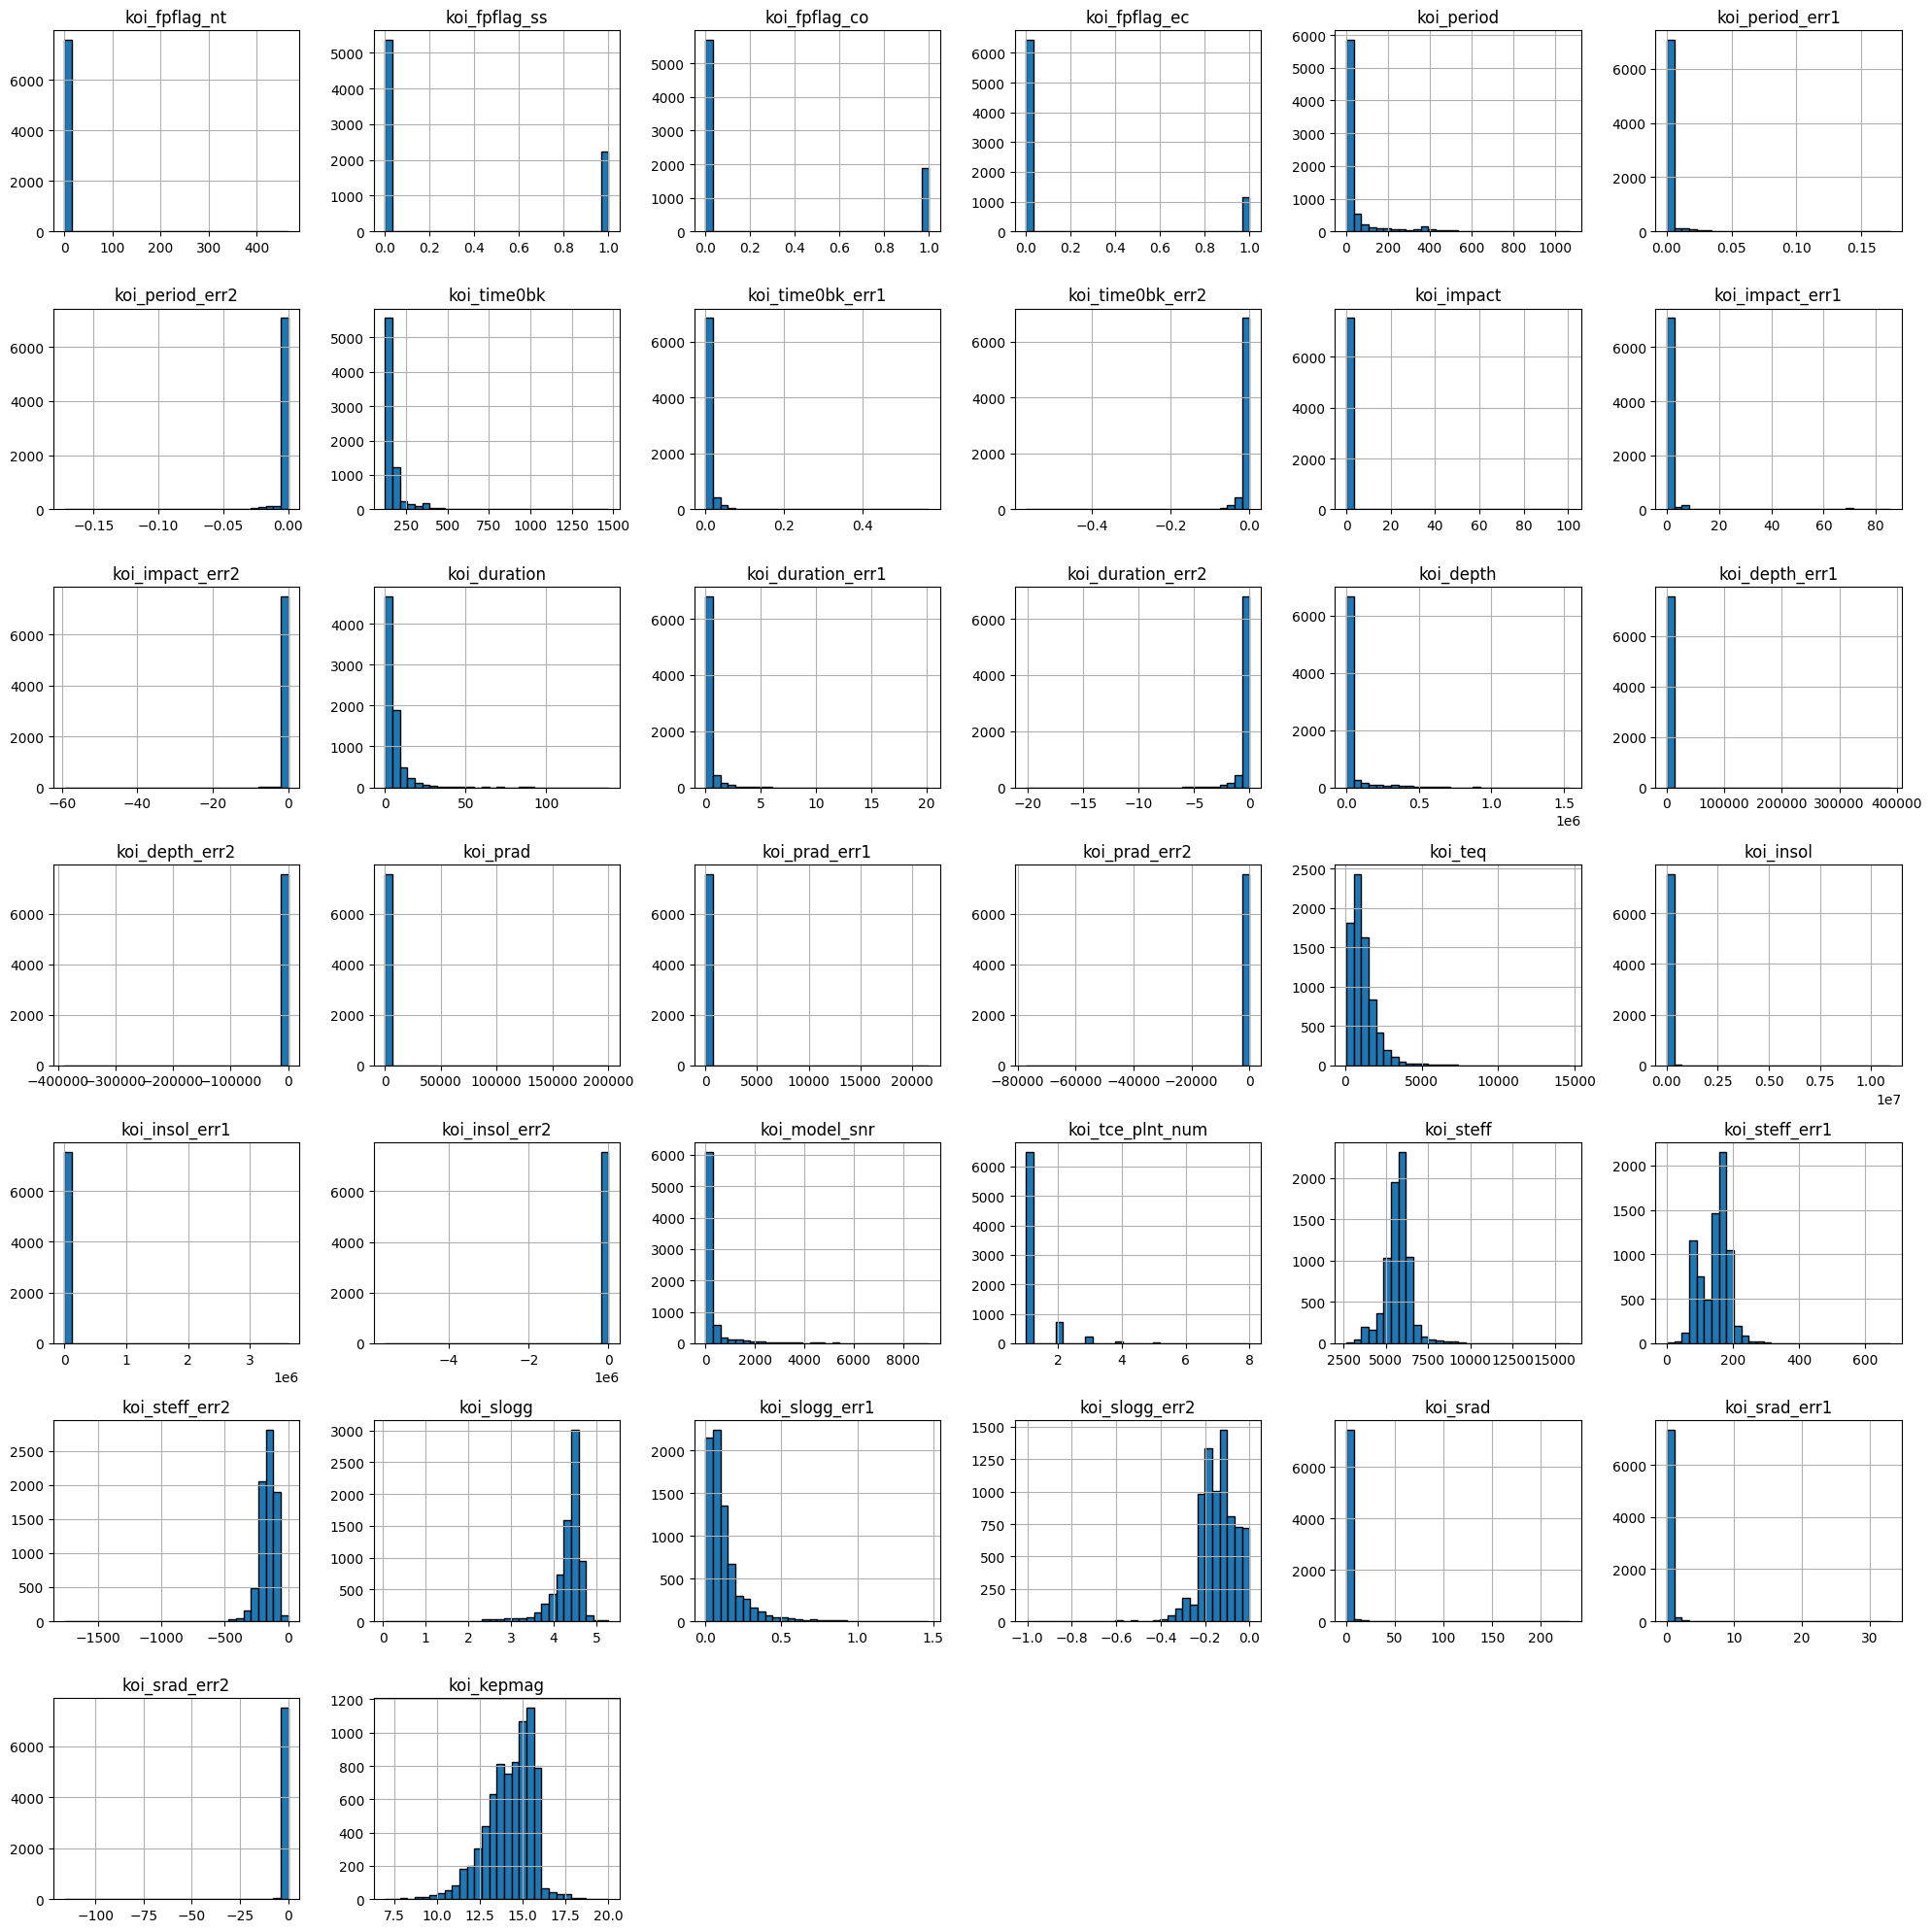

In [19]:
# Plot histograms for numerical columns
kepler.hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

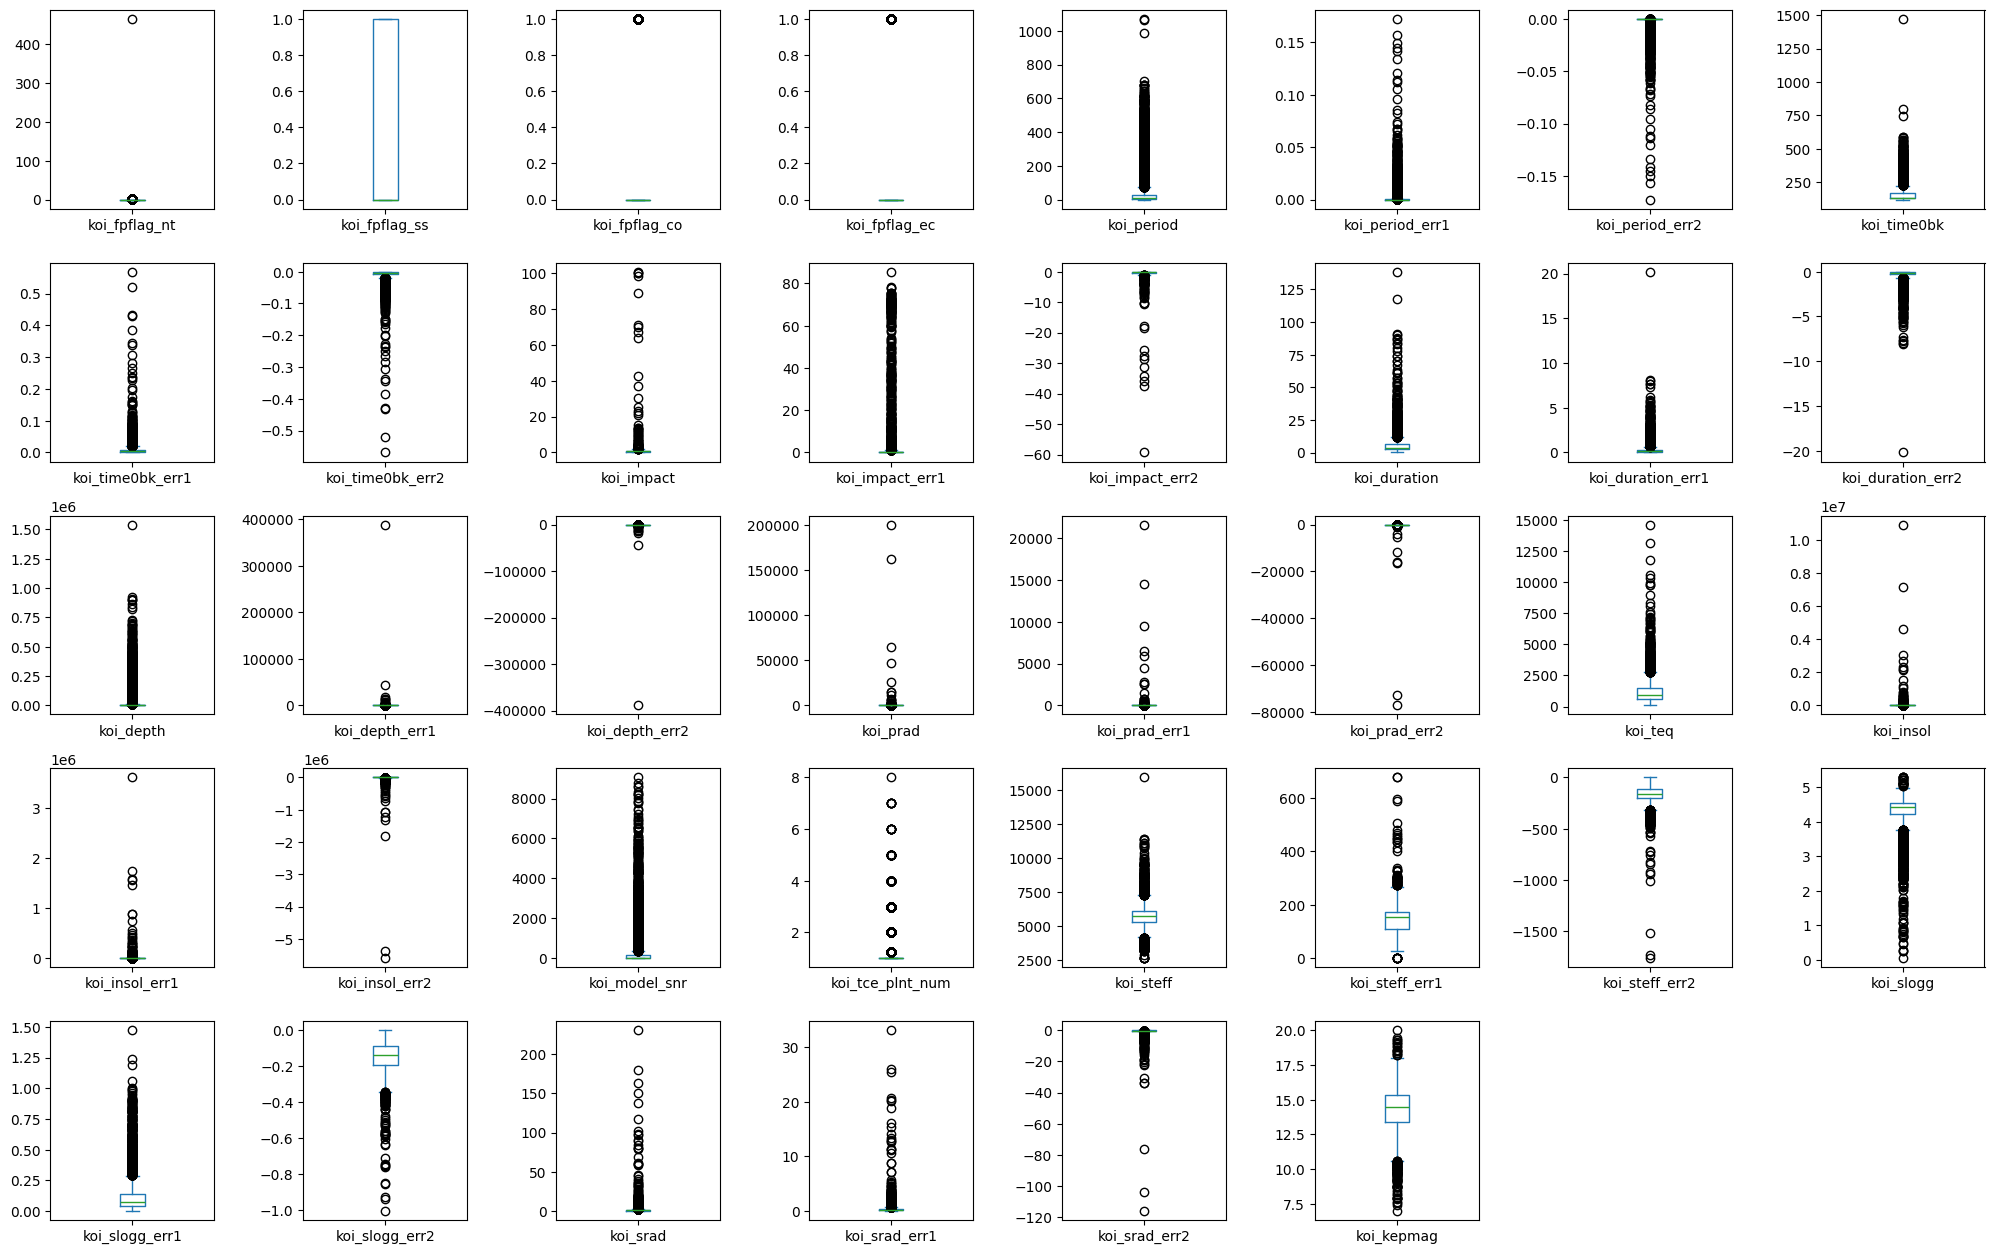

In [20]:
# Box plot for numerical columns
kepler.plot(kind='box', subplots=True, layout=(8, 8), figsize=(20, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


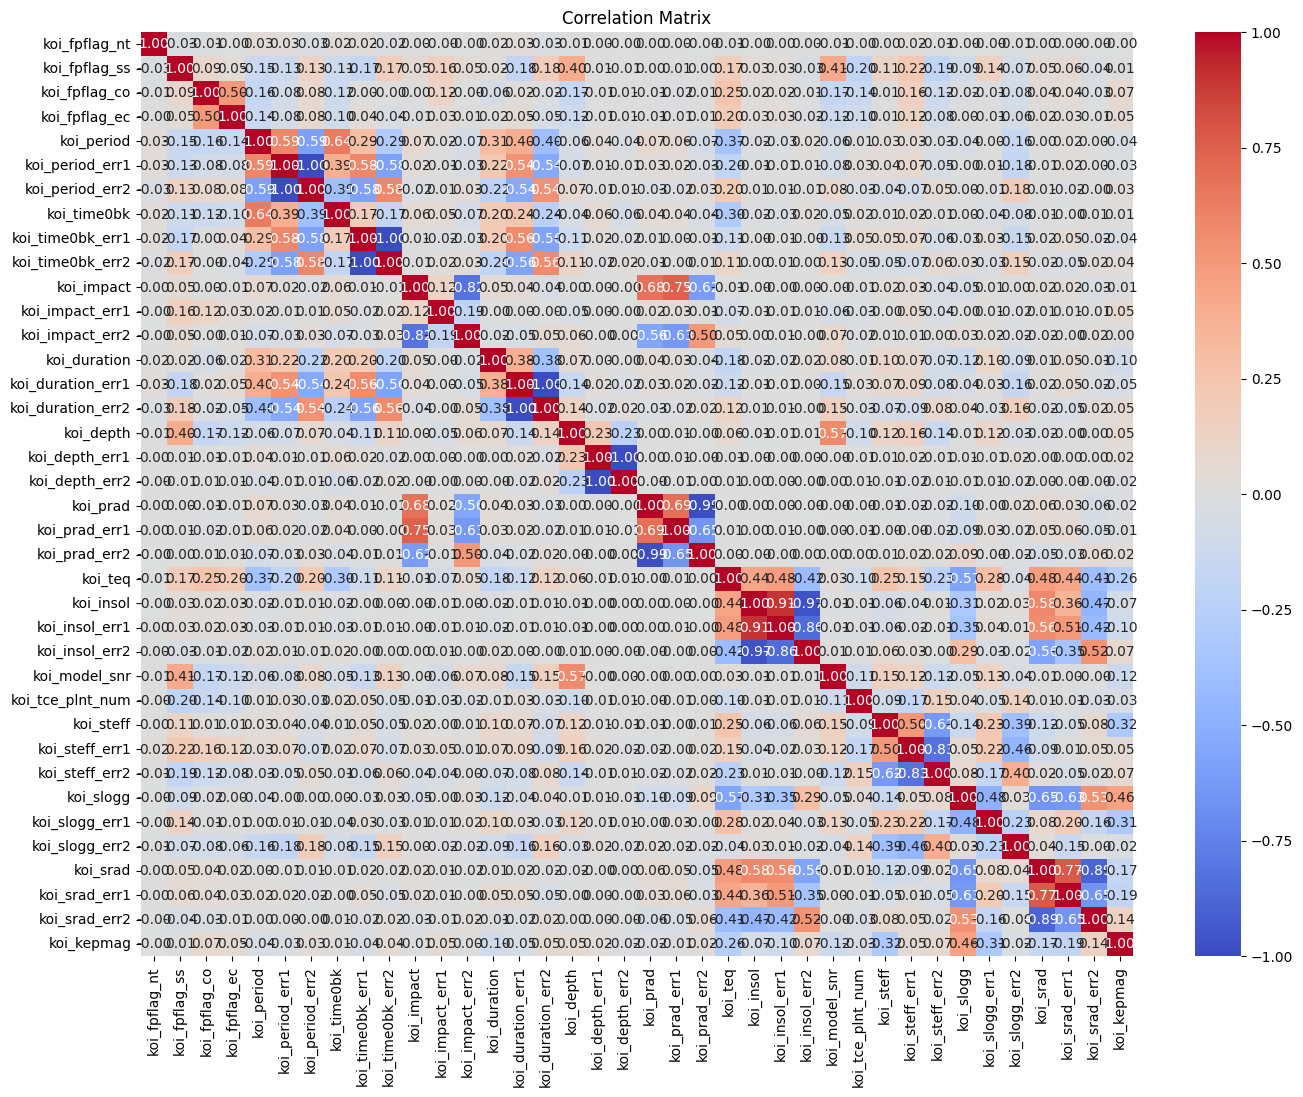

In [21]:
# Calculate and display the correlation matrix for numeric columns only
numeric_kepler = kepler.select_dtypes(include=[np.number])
corr_matrix = numeric_kepler.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

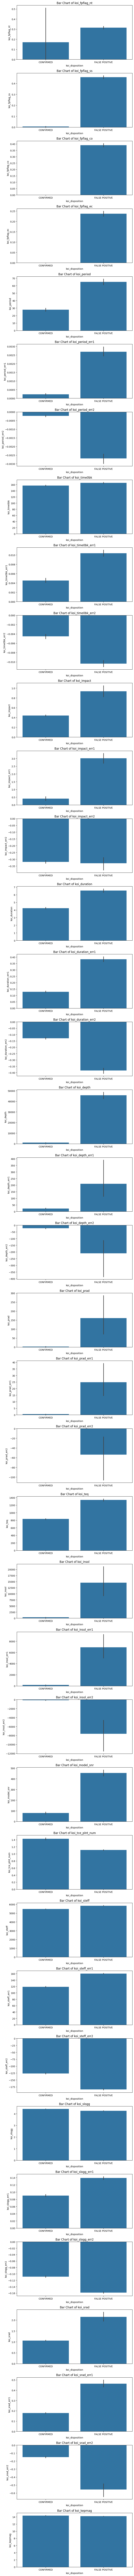

In [22]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(numList), ncols=1, figsize=(8, 4 * len(numList)))

# Iterate through numeric columns and plot bar charts
for i, column in enumerate(numList):
    sns.barplot(data=kepler, x='koi_disposition', y=column, ax=axes[i])
    axes[i].set_title(f'Bar Chart of {column}')
    axes[i].set_xlabel('koi_disposition')
    axes[i].set_ylabel(column)

# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()

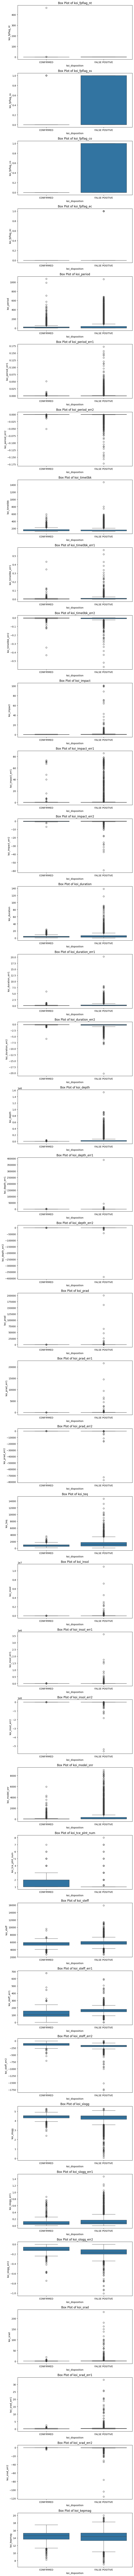

In [23]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(numList), ncols=1, figsize=(8, 4 * len(numList)))

# Iterate through numeric columns and plot box plots
for i, column in enumerate(numList):
    sns.boxplot(data=kepler, x='koi_disposition', y=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel('koi_disposition')
    axes[i].set_ylabel(column)

# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()

**Anderson-Darling Test:** The Anderson-Darling test is used to assess whether a sample comes from a specific distribution, including normal distribution.

In [24]:
# Apply the Anderson-Darling Test on each numeric column
for column in numList:
    # Perform the Anderson-Darling test
    result = anderson(kepler[column])

    # Print the result
    print(f"\nColumn: {column}")
    print(f"Anderson-Darling Statistic: {result.statistic}")

    # Check if the data follows a normal distribution based on the 5% significance level
    if result.statistic > result.critical_values[2]:
        print("The data does not follow a normal distribution.")
    else:
        print("The data follows a normal distribution.")


Column: koi_fpflag_nt
Anderson-Darling Statistic: 2590.943594507007
The data does not follow a normal distribution.

Column: koi_fpflag_ss
Anderson-Darling Statistic: 1673.8554651573959
The data does not follow a normal distribution.

Column: koi_fpflag_co
Anderson-Darling Statistic: 1822.0015199404497
The data does not follow a normal distribution.

Column: koi_fpflag_ec
Anderson-Darling Statistic: 2242.1299172684594
The data does not follow a normal distribution.

Column: koi_period
Anderson-Darling Statistic: 1518.4878485009904
The data does not follow a normal distribution.

Column: koi_period_err1
Anderson-Darling Statistic: 2144.580153722749
The data does not follow a normal distribution.

Column: koi_period_err2
Anderson-Darling Statistic: 2144.580153722749
The data does not follow a normal distribution.

Column: koi_time0bk
Anderson-Darling Statistic: 1223.0183048610197
The data does not follow a normal distribution.

Column: koi_time0bk_err1
Anderson-Darling Statistic: 1305.5

**Shapiro-Wilk Test -** The Shapiro-Wilk test is used to check if a given sample comes from a normally distributed population. This test tests the null hypothesis that the data was drawn from a normal distribution.

In [25]:
# Apply the Shapiro-Wilk Test on each numeric column
for column in numList:
    # Perform the Shapiro-Wilk test
    stat, p_value = shapiro(kepler[column])

    # Print the result
    print(f"\nColumn: {column}")
    print(f"Shapiro-Wilk Statistic: {stat}")
    print(f"P-value: {p_value}")

    # Check if the data follows a normal distribution based on the 5% significance level
    if p_value > 0.05:
        print("The data follows a normal distribution.")
    else:
        print("The data does not follow a normal distribution.")


Column: koi_fpflag_nt
Shapiro-Wilk Statistic: 0.009640573086473259
P-value: 4.3432941266850124e-107
The data does not follow a normal distribution.

Column: koi_fpflag_ss
Shapiro-Wilk Statistic: 0.5713590696772681
P-value: 6.565350136718846e-87
The data does not follow a normal distribution.

Column: koi_fpflag_co
Shapiro-Wilk Statistic: 0.5378898249485771
P-value: 1.2394457073784953e-88
The data does not follow a normal distribution.

Column: koi_fpflag_ec
Shapiro-Wilk Statistic: 0.42845411625365926
P-value: 1.3365172647248716e-93
The data does not follow a normal distribution.

Column: koi_period
Shapiro-Wilk Statistic: 0.5029711770916789
P-value: 2.5488835659002837e-90
The data does not follow a normal distribution.

Column: koi_period_err1
Shapiro-Wilk Statistic: 0.22987811603065444
P-value: 8.391780832953888e-101
The data does not follow a normal distribution.

Column: koi_period_err2
Shapiro-Wilk Statistic: 0.229878116030653
P-value: 8.391780832953172e-101
The data does not foll

### Tranformation
-------------------------

##### koi_period

Length of unique values in the 'koi_period' column: 7580


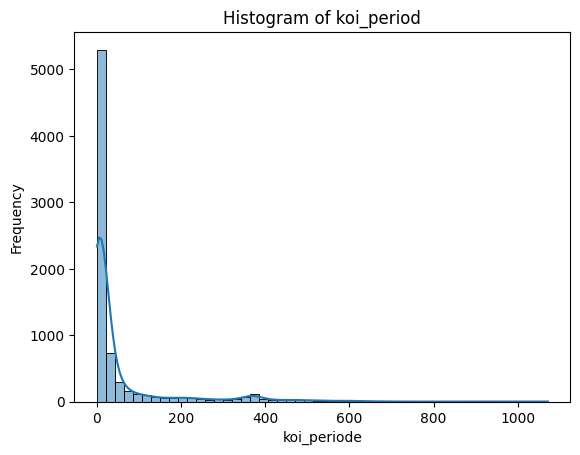

In [26]:
print("Length of unique values in the 'koi_period' column:", len(kepler['koi_period'].unique()))

sns.histplot(data = kepler, x = "koi_period", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_period')
plt.xlabel('koi_periode')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [27]:
# Apply logarithmic transformation
kepler['koi_period_log'] = np.log1p(kepler['koi_period'])

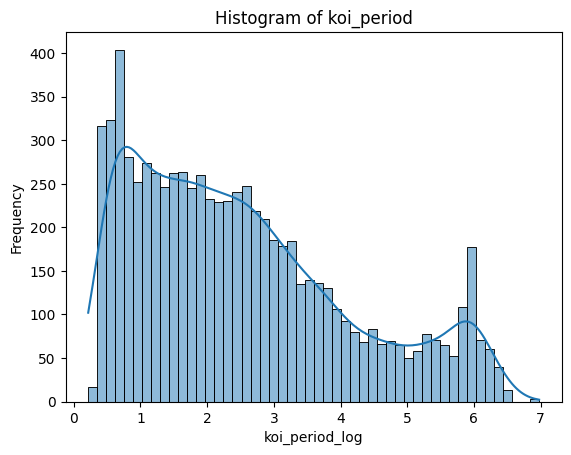

In [28]:
sns.histplot(data = kepler, x = "koi_period_log", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_period')
plt.xlabel('koi_period_log')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [29]:
from scipy.stats import boxcox
# Apply Box-Cox transformation
kepler['koi_period_boxcox'], lambda_value = boxcox(kepler['koi_period'])

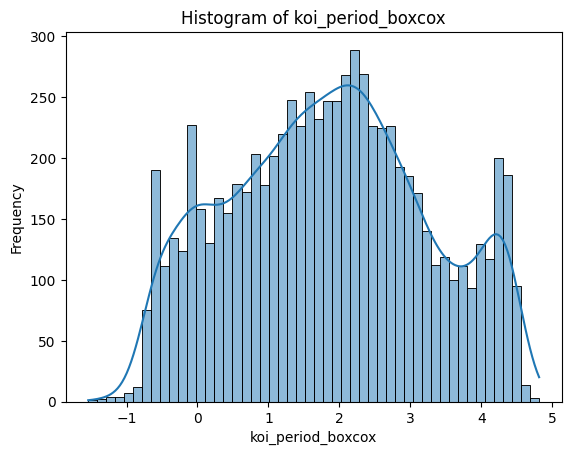

In [30]:
sns.histplot(data = kepler, x = "koi_period_boxcox", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_period_boxcox')
plt.xlabel('koi_period_boxcox')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

Now appling BOX-Cox transformation to koi_period. Delete the 2 columns.

In [31]:
kepler['koi_period'], lambda_value = boxcox(kepler['koi_period'])
kepler = kepler.drop(['koi_period_boxcox', 'koi_period_log'], axis=1)

#### koi_period_err1

Length of unique values in the 'koi_period_err1' column: 3917


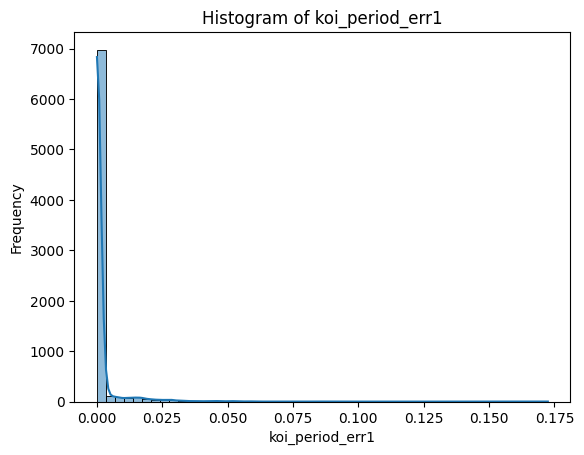

In [32]:
print("Length of unique values in the 'koi_period_err1' column:", len(kepler['koi_period_err1'].unique()))

sns.histplot(data = kepler, x = "koi_period_err1", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_period_err1')
plt.xlabel('koi_period_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [33]:
# Apply logarithmic transformation
kepler['koi_period_err1_log'] = np.log(kepler['koi_period_err1'])

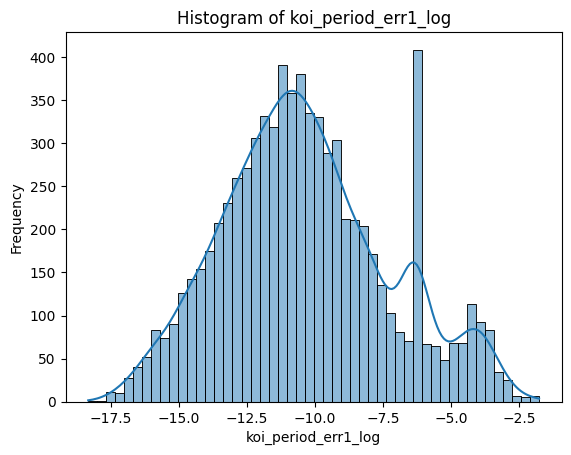

In [34]:
sns.histplot(data = kepler, x = "koi_period_err1_log", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_period_err1_log')
plt.xlabel('koi_period_err1_log')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [35]:
kepler['koi_period_err1_boxcox'], lambda_value = boxcox(kepler['koi_period_err1'])

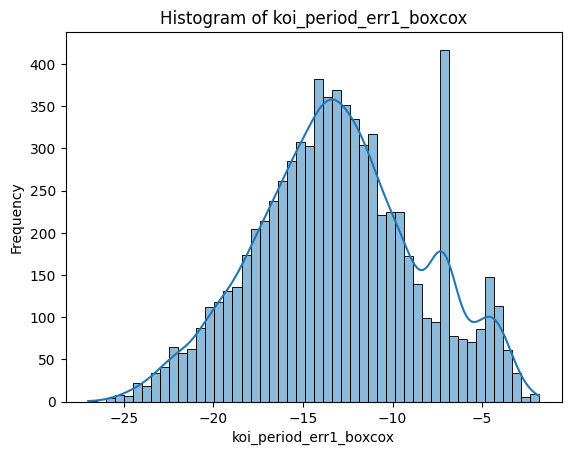

In [36]:
sns.histplot(data = kepler, x = "koi_period_err1_boxcox", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_period_err1_boxcox')
plt.xlabel('koi_period_err1_boxcox')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [37]:
kepler['koi_period_err1'] = np.log(kepler['koi_period_err1'])
kepler = kepler.drop(['koi_period_err1_log', 'koi_period_err1_boxcox'], axis=1)

#### koi_period_err2

Length of unique values in the 'koi_period_err2' column: 3917


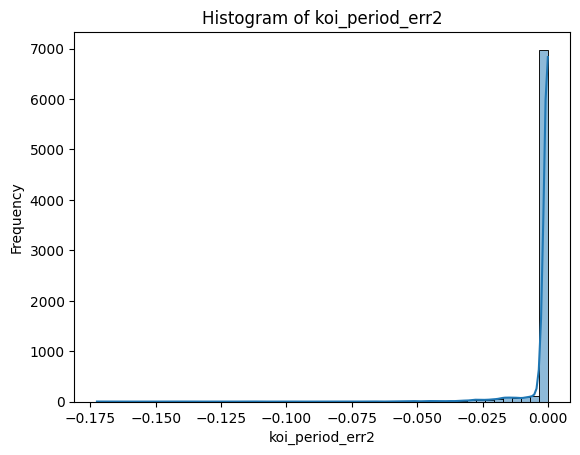

In [38]:
print("Length of unique values in the 'koi_period_err2' column:", len(kepler['koi_period_err2'].unique()))

sns.histplot(data = kepler, x = "koi_period_err2", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_period_err2')
plt.xlabel('koi_period_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [39]:
# Apply exponential transformation
kepler['koi_period_err2_exp'] = np.exp(kepler['koi_period_err2'])

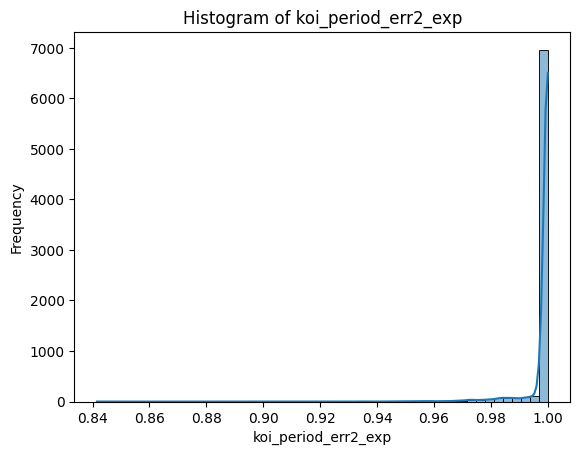

In [40]:
sns.histplot(data = kepler, x = "koi_period_err2_exp", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_period_err2_exp')
plt.xlabel('koi_period_err2_exp')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [41]:
# Apply log-odds transformation
kepler['koi_period_err2_logodds'] = np.log(1 / (1 - kepler['koi_period_err2']))

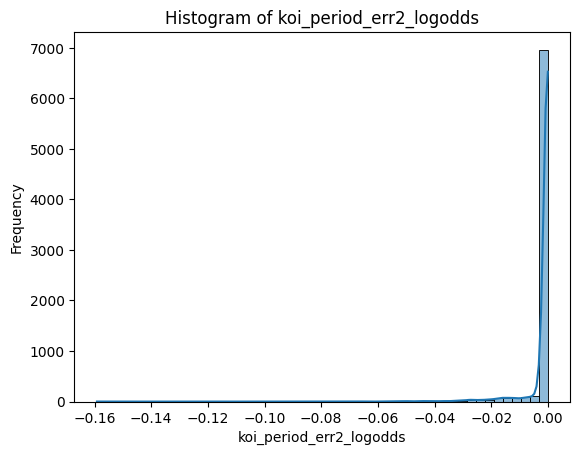

In [42]:
sns.histplot(data = kepler, x = "koi_period_err2_logodds", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_period_err2_logodds')
plt.xlabel('koi_period_err2_logodds')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [43]:
kepler['koi_period_err2'] = np.exp(kepler['koi_period_err2'])
kepler = kepler.drop(['koi_period_err2_exp', 'koi_period_err2_logodds'], axis=1)

#### koi_time0bk

Length of unique values in the 'koi_time0bk' column: 7561


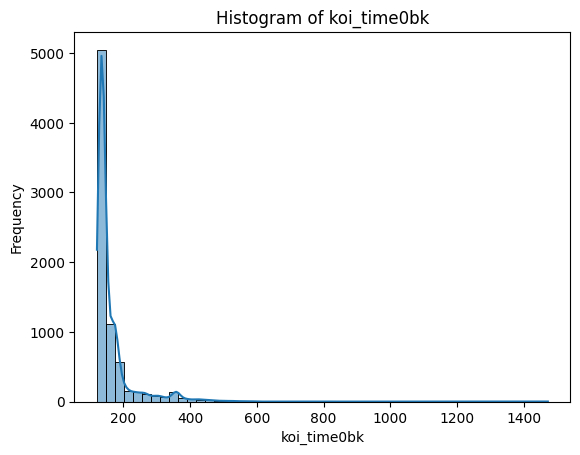

In [44]:
print("Length of unique values in the 'koi_time0bk' column:", len(kepler['koi_time0bk'].unique()))

sns.histplot(data = kepler, x = "koi_time0bk", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_time0bk')
plt.xlabel('koi_time0bk')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [45]:
# Apply logarithmic transformation
kepler['koi_time0bk_log'] = np.log(kepler['koi_time0bk'])

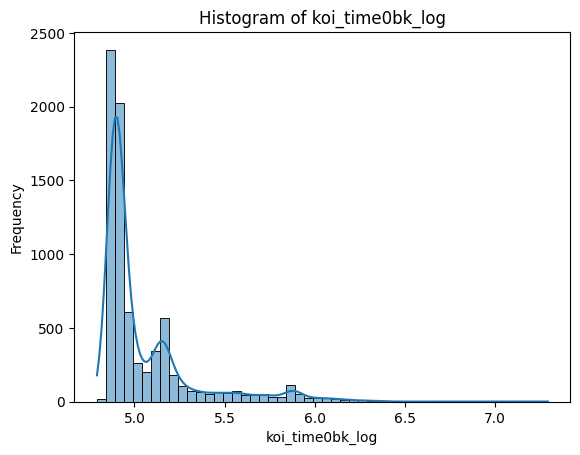

In [46]:
sns.histplot(data = kepler, x = "koi_time0bk_log", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_time0bk_log')
plt.xlabel('koi_time0bk_log')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [47]:
# Apply Box-Cox transformation
kepler['koi_time0bk_boxcox'], lambda_value = boxcox(kepler['koi_time0bk'])

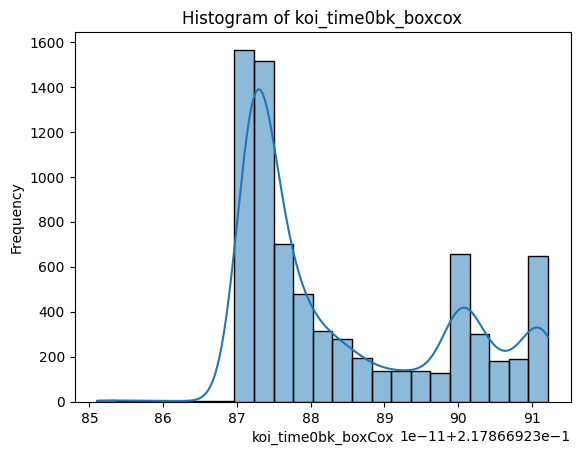

In [48]:
sns.histplot(data = kepler, x = "koi_time0bk_boxcox", discrete = False, kde = True)
plt.title('Histogram of koi_time0bk_boxcox')
plt.xlabel('koi_time0bk_boxCox')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [49]:
kepler['koi_time0bk'] = np.log(kepler['koi_time0bk'])
kepler = kepler.drop(['koi_time0bk_boxcox', 'koi_time0bk_log'], axis=1)

#### koi_time0bk_err1

Length of unique values in the 'koi_time0bk_err1' column: 2385


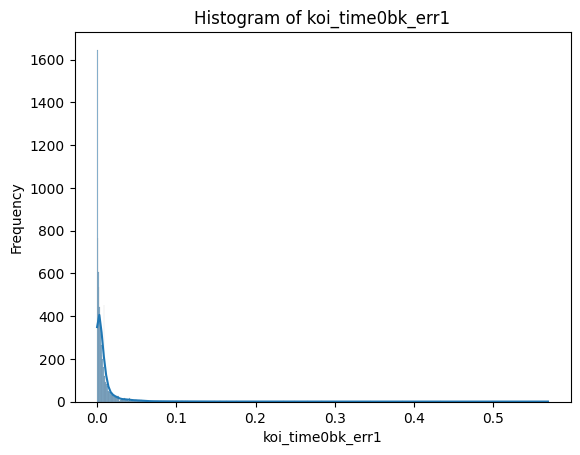

In [50]:
print("Length of unique values in the 'koi_time0bk_err1' column:", len(kepler['koi_time0bk_err1'].unique()))

sns.histplot(data = kepler, x = "koi_time0bk_err1", discrete = False, kde = True)
plt.title('Histogram of koi_time0bk_err1')
plt.xlabel('koi_time0bk_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

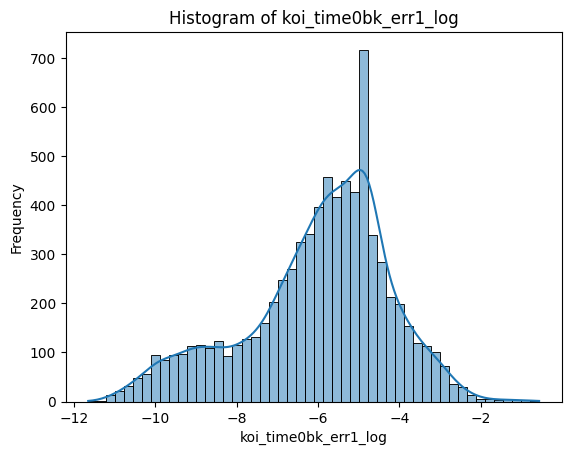

In [51]:
# Apply logarithmic transformation
kepler['koi_time0bk_err1_log'] = np.log(kepler['koi_time0bk_err1'])

sns.histplot(data = kepler, x = "koi_time0bk_err1_log", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_time0bk_err1_log')
plt.xlabel('koi_time0bk_err1_log')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [52]:
# Apply Box-Cox transformation
kepler['koi_time0bk_err1_boxcox'], lambda_value = boxcox(kepler['koi_time0bk_err1'])

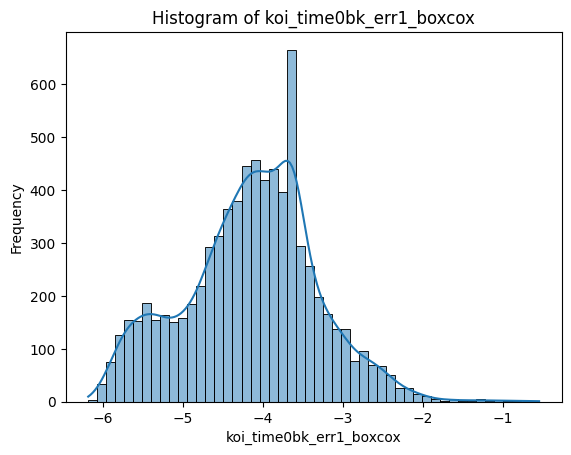

In [53]:
sns.histplot(data = kepler, x = "koi_time0bk_err1_boxcox", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_time0bk_err1_boxcox')
plt.xlabel('koi_time0bk_err1_boxcox')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [54]:
# Apply Box-Cox transformation
kepler['koi_time0bk_err1'], lambda_value = boxcox(kepler['koi_time0bk_err1'])
kepler = kepler.drop(['koi_time0bk_err1_boxcox', 'koi_time0bk_err1_log'], axis=1)

#### koi_time0bk_err2

Length of unique values in the 'koi_time0bk_err2' column: 2385


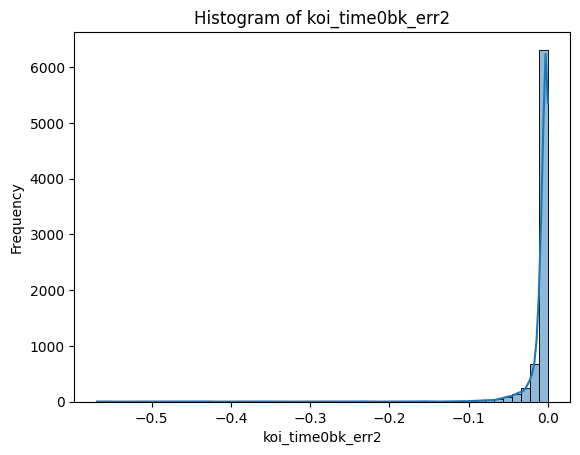

In [55]:
print("Length of unique values in the 'koi_time0bk_err2' column:", len(kepler['koi_time0bk_err2'].unique()))

sns.histplot(data = kepler, x = "koi_time0bk_err2", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_time0bk_err2')
plt.xlabel('koi_time0bk_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [56]:
# Apply exponential transformation
kepler['koi_time0bk_err2'] = np.exp(kepler['koi_time0bk_err2'])

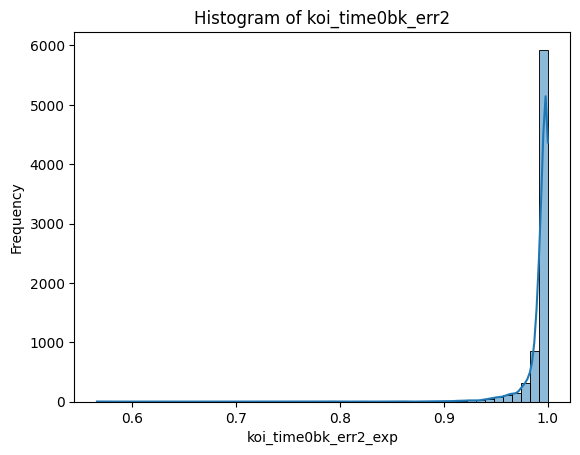

In [57]:
sns.histplot(data = kepler, x = "koi_time0bk_err2", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_time0bk_err2')
plt.xlabel('koi_time0bk_err2_exp')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_impact

Length of unique values in the 'koi_impact' column: 1983


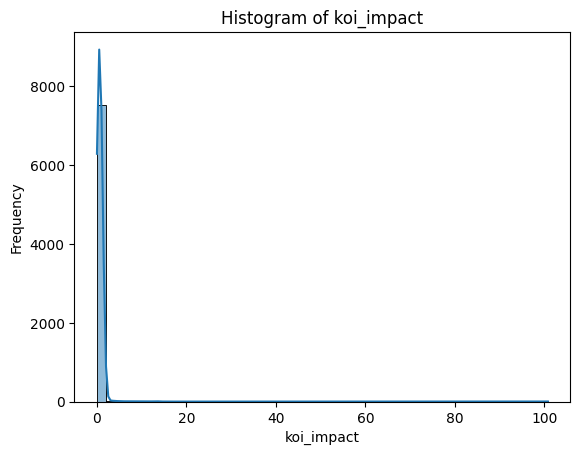

In [58]:
print("Length of unique values in the 'koi_impact' column:", len(kepler['koi_impact'].unique()))

sns.histplot(data = kepler, x = "koi_impact", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_impact')
plt.xlabel('koi_impact')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [59]:
# Apply logarithmic transformation
kepler['koi_impact'] = np.log(kepler['koi_impact'])

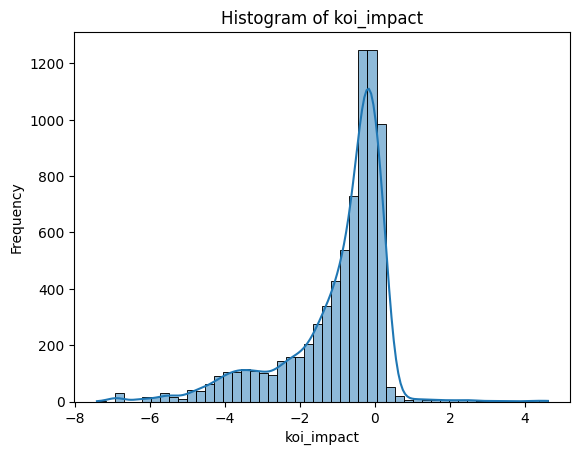

In [60]:
sns.histplot(data = kepler, x = "koi_impact", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_impact')
plt.xlabel('koi_impact')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_impact_err1

Length of unique values in the 'koi_impact_err1' column: 1770


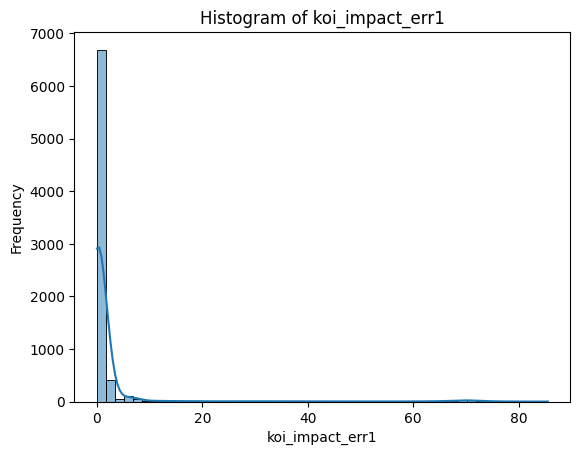

In [61]:
print("Length of unique values in the 'koi_impact_err1' column:", len(kepler['koi_impact_err1'].unique()))

sns.histplot(data = kepler, x = "koi_impact_err1", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_impact_err1')
plt.xlabel('koi_impact_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [62]:
kepler['koi_impact_err1'] = np.log(kepler['koi_impact_err1'])

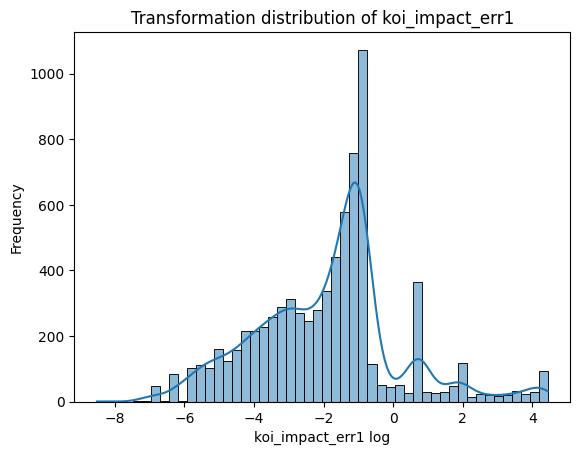

In [63]:
sns.histplot(data = kepler, x = "koi_impact_err1", discrete = False, kde = True, bins= 50)
plt.title('Transformation distribution of koi_impact_err1')
plt.xlabel('koi_impact_err1 log')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_impact_err2

Length of unique values in the 'koi_impact_err2' column: 1453


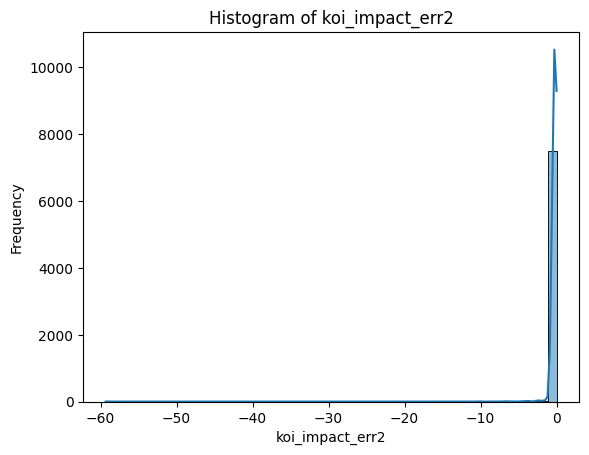

In [64]:
print("Length of unique values in the 'koi_impact_err2' column:", len(kepler['koi_impact_err2'].unique()))

sns.histplot(data = kepler, x = "koi_impact_err2", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_impact_err2')
plt.xlabel('koi_impact_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [65]:
# Apply exponential transformation
kepler['koi_impact_err2'] = np.exp(kepler['koi_impact_err2'])

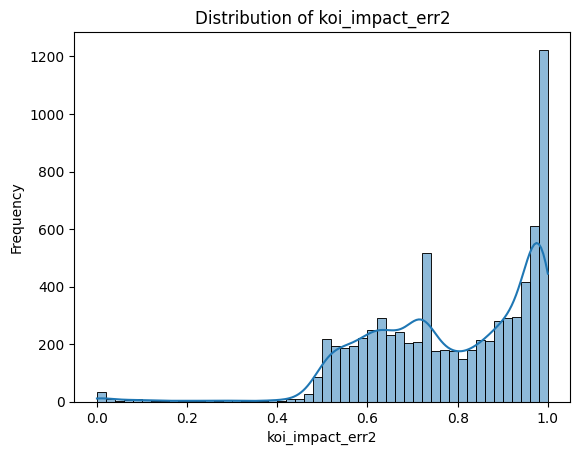

In [66]:
sns.histplot(data = kepler, x = "koi_impact_err2", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_impact_err2')
plt.xlabel('koi_impact_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_duration

Length of unique values in the 'koi_duration' column: 6649


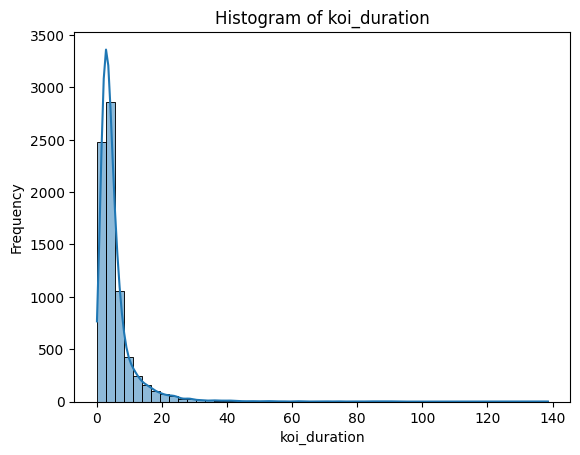

In [67]:
print("Length of unique values in the 'koi_duration' column:", len(kepler['koi_duration'].unique()))

sns.histplot(data = kepler, x = "koi_duration", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_duration')
plt.xlabel('koi_duration')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [68]:
kepler['koi_duration'] = np.log(kepler['koi_duration'])

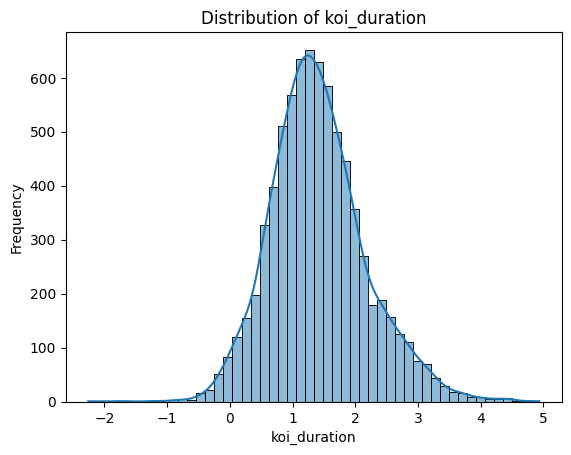

In [69]:
sns.histplot(data = kepler, x = "koi_duration", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_duration')
plt.xlabel('koi_duration')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_duration_err1

Length of unique values in the 'koi_duration_err1' column: 2159


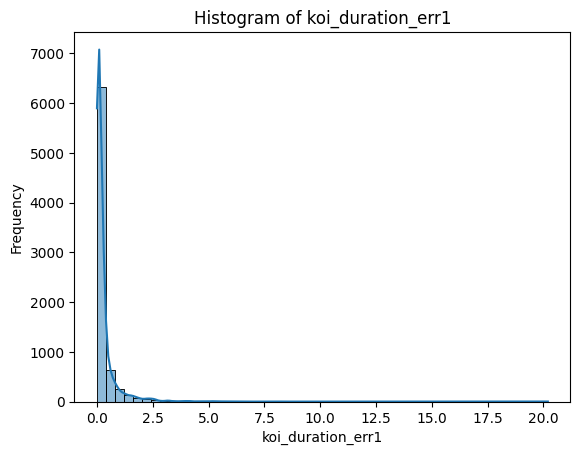

In [70]:
print("Length of unique values in the 'koi_duration_err1' column:", len(kepler['koi_duration_err1'].unique()))

sns.histplot(data = kepler, x = "koi_duration_err1", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_duration_err1')
plt.xlabel('koi_duration_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [71]:
kepler['koi_duration_err1'] = np.log(kepler['koi_duration_err1'])

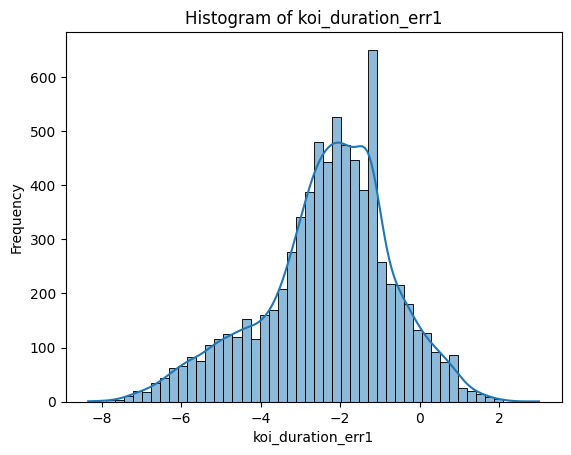

In [72]:
sns.histplot(data = kepler, x = "koi_duration_err1", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_duration_err1')
plt.xlabel('koi_duration_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_duration_err2

Length of unique values in the 'koi_duration_err2' column: 2159


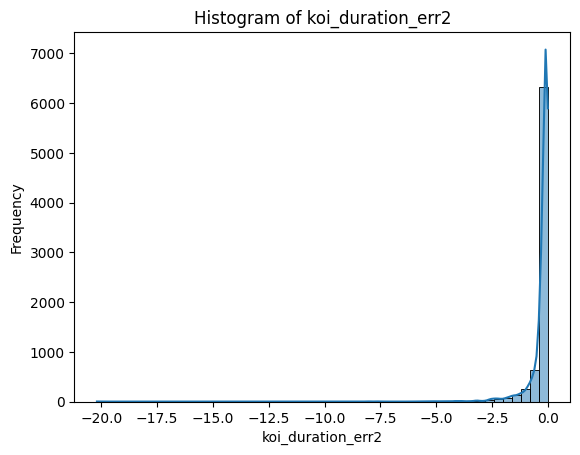

In [73]:
print("Length of unique values in the 'koi_duration_err2' column:", len(kepler['koi_duration_err2'].unique()))

sns.histplot(data = kepler, x = "koi_duration_err2", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_duration_err2')
plt.xlabel('koi_duration_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [74]:
# Apply exponential transformation
kepler['koi_duration_err2'] = np.exp(kepler['koi_duration_err2'])

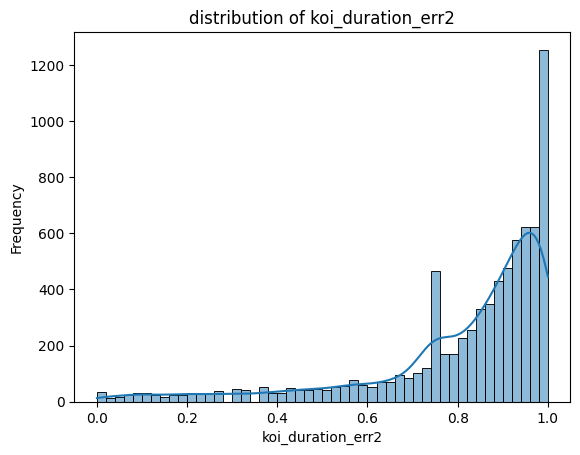

In [75]:
sns.histplot(data = kepler, x = "koi_duration_err2", discrete = False, kde = True, bins= 50)
plt.title('distribution of koi_duration_err2')
plt.xlabel('koi_duration_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_depth

Length of unique values in the 'koi_depth' column: 6054


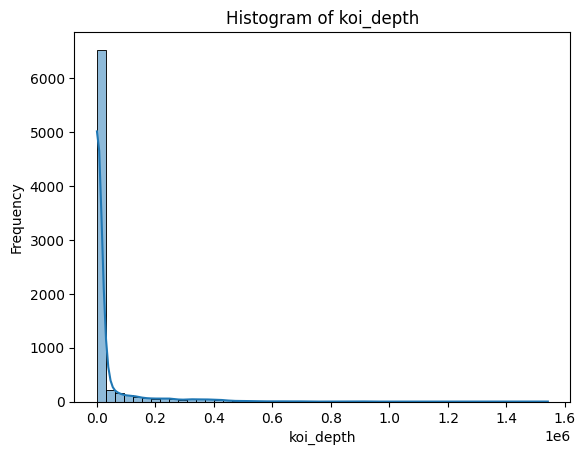

In [76]:
print("Length of unique values in the 'koi_depth' column:", len(kepler['koi_depth'].unique()))

sns.histplot(data = kepler, x = "koi_depth", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_depth')
plt.xlabel('koi_depth')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [77]:
kepler['koi_depth'] = np.log(kepler['koi_depth'])

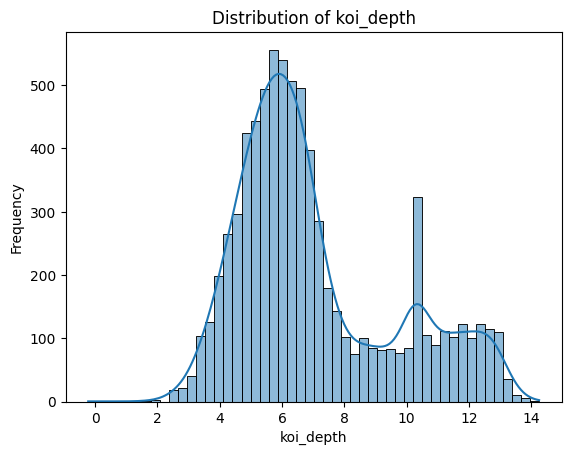

In [78]:
sns.histplot(data = kepler, x = "koi_depth", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_depth')
plt.xlabel('koi_depth')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_depth_err1

In [79]:
kepler.shape

(7580, 42)

Length of unique values in the 'koi_depth_err1' column: 1363


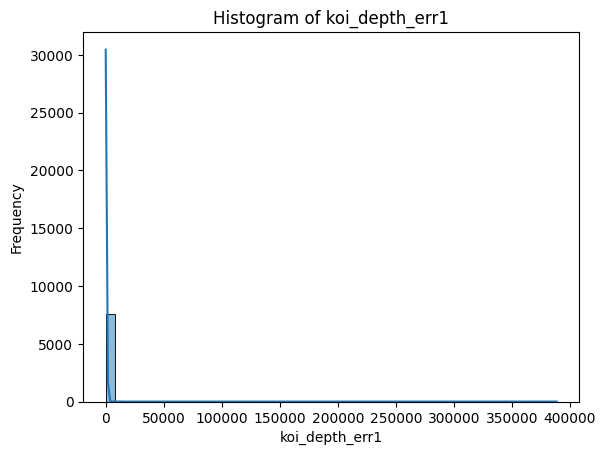

In [80]:
print("Length of unique values in the 'koi_depth_err1' column:", len(kepler['koi_depth_err1'].unique()))

sns.histplot(data = kepler, x = "koi_depth_err1", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_depth_err1')
plt.xlabel('koi_depth_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [81]:
kepler['koi_depth_err1'] = np.log(kepler['koi_depth_err1'])

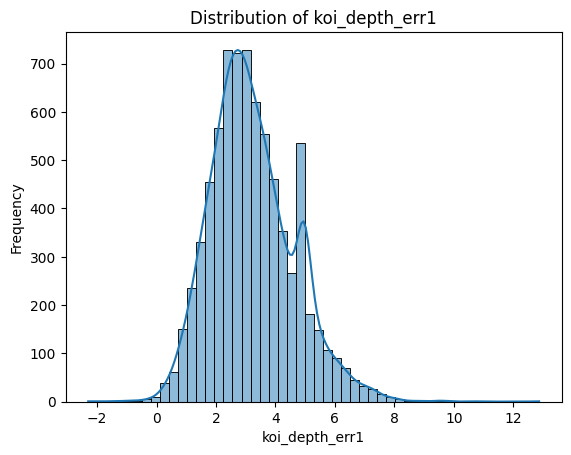

In [82]:
sns.histplot(data = kepler, x = "koi_depth_err1", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_depth_err1')
plt.xlabel('koi_depth_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_depth_err2

Length of unique values in the 'koi_depth_err2' column: 1363


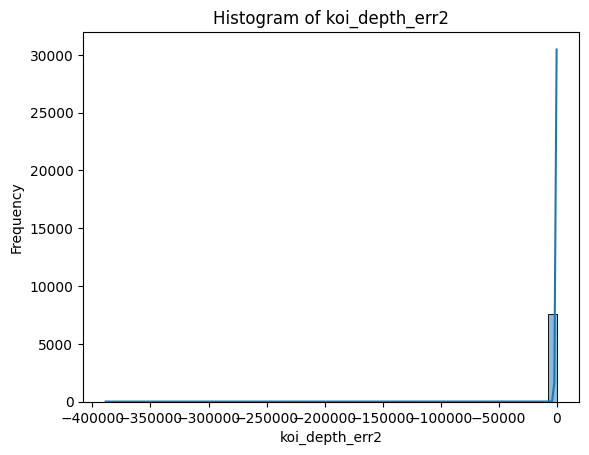

In [83]:
print("Length of unique values in the 'koi_depth_err2' column:", len(kepler['koi_depth_err2'].unique()))

sns.histplot(data = kepler, x = "koi_depth_err2", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_depth_err2')
plt.xlabel('koi_depth_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [84]:
# Apply exponential transformation
kepler['koi_depth_err2'] = np.exp(kepler['koi_depth_err2'])

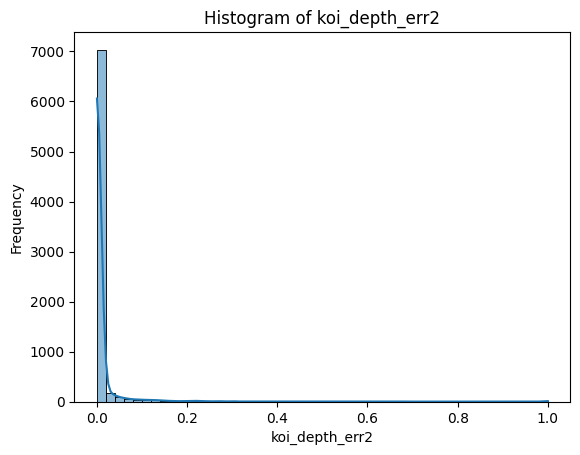

In [85]:
sns.histplot(data = kepler, x = "koi_depth_err2", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_depth_err2')
plt.xlabel('koi_depth_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_prad

Length of unique values in the 'koi_prad' column: 2788


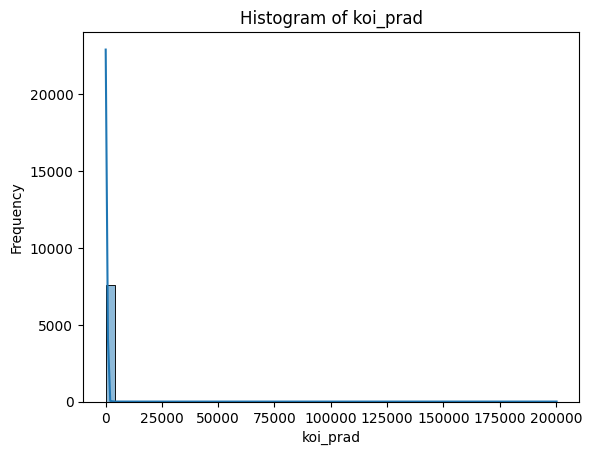

In [86]:
print("Length of unique values in the 'koi_prad' column:", len(kepler['koi_prad'].unique()))

sns.histplot(data = kepler, x = "koi_prad", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_prad')
plt.xlabel('koi_prad')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [87]:
kepler['koi_prad_log'] = np.log(kepler['koi_prad'])

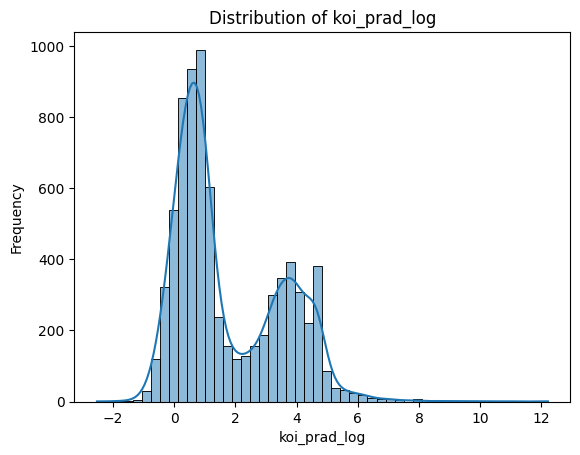

In [88]:
sns.histplot(data = kepler, x = "koi_prad_log", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_prad_log')
plt.xlabel('koi_prad_log')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [89]:
kepler['koi_prad_boxcox'], lambda_value = boxcox(kepler['koi_prad'])

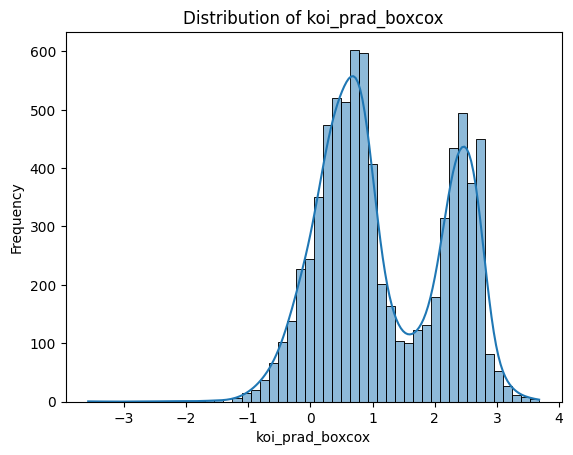

In [90]:
sns.histplot(data = kepler, x = "koi_prad_boxcox", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_prad_boxcox')
plt.xlabel('koi_prad_boxcox')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [91]:
kepler['koi_prad'] = np.log(kepler['koi_prad'])
kepler = kepler.drop(['koi_prad_boxcox', 'koi_prad_log'], axis=1)

#### koi_prad_err1

Length of unique values in the 'koi_prad_err1' column: 1727


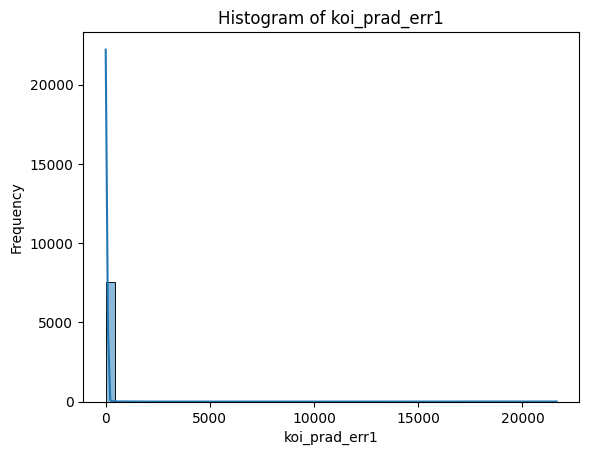

In [92]:
print("Length of unique values in the 'koi_prad_err1' column:", len(kepler['koi_prad_err1'].unique()))

sns.histplot(data = kepler, x = "koi_prad_err1", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_prad_err1')
plt.xlabel('koi_prad_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [93]:
kepler['koi_prad_err1'] = np.log(kepler['koi_prad_err1'])

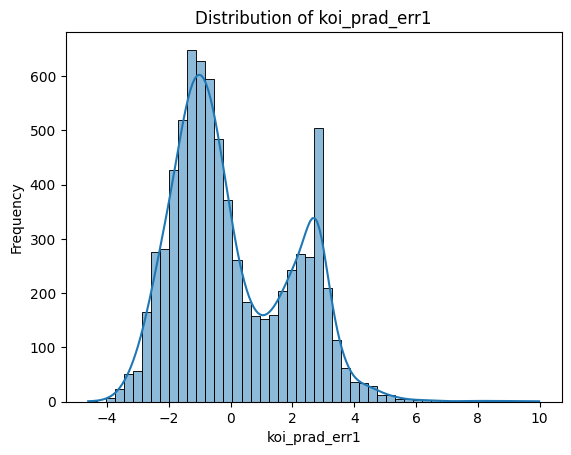

In [94]:
sns.histplot(data = kepler, x = "koi_prad_err1", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_prad_err1')
plt.xlabel('koi_prad_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_prad_err2

Length of unique values in the 'koi_prad_err2' column: 1504


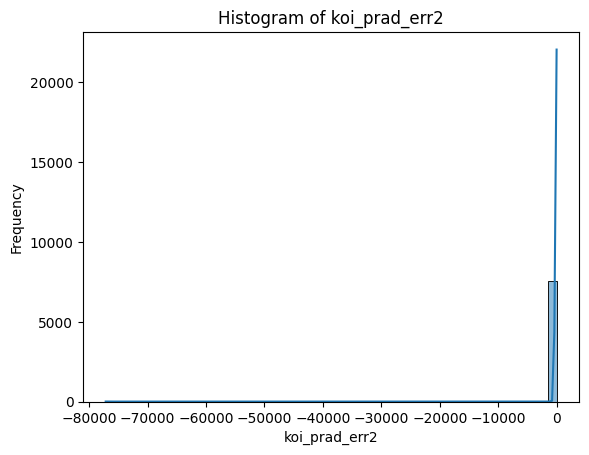

In [95]:
print("Length of unique values in the 'koi_prad_err2' column:", len(kepler['koi_prad_err2'].unique()))

sns.histplot(data = kepler, x = "koi_prad_err2", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_prad_err2')
plt.xlabel('koi_prad_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [96]:
kepler['koi_prad_err2'] = np.exp(kepler['koi_prad_err2'])

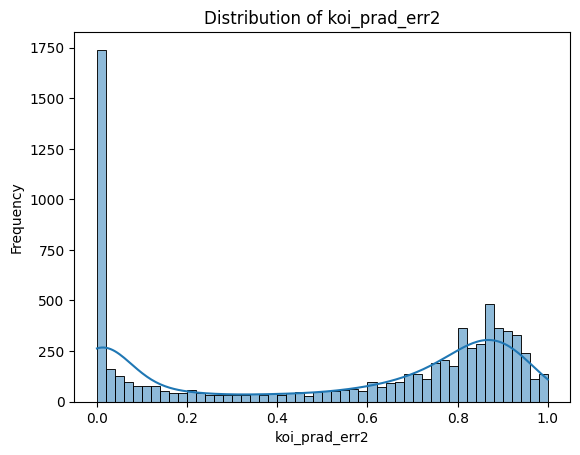

In [97]:
sns.histplot(data = kepler, x = "koi_prad_err2", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_prad_err2')
plt.xlabel('koi_prad_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_teq

Length of unique values in the 'koi_teq' column: 2431


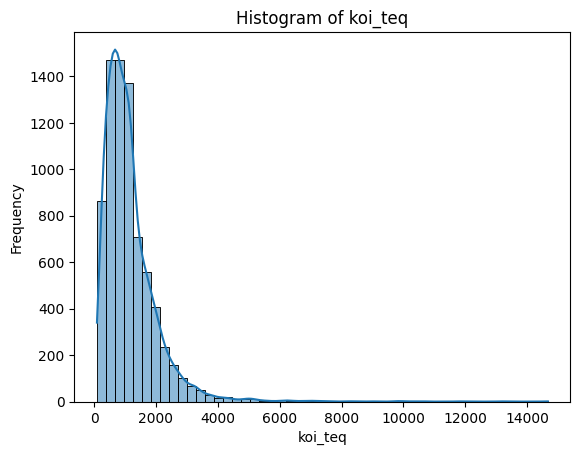

In [98]:
print("Length of unique values in the 'koi_teq' column:", len(kepler['koi_teq'].unique()))

sns.histplot(data = kepler, x = "koi_teq", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_teq')
plt.xlabel('koi_teq')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [99]:
kepler['koi_teq'] = np.log(kepler['koi_teq'])

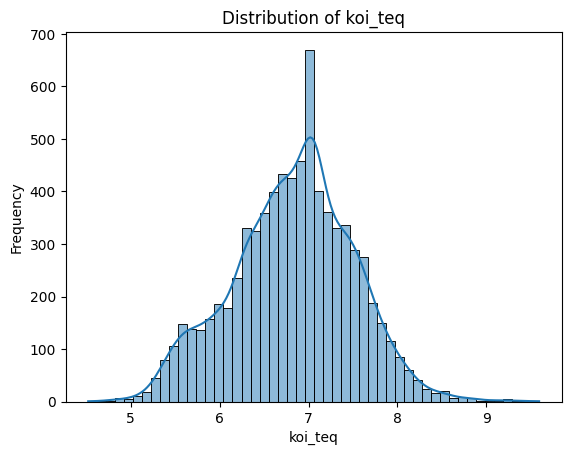

In [100]:
sns.histplot(data = kepler, x = "koi_teq", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_teq')
plt.xlabel('koi_teq')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_insol

Length of unique values in the 'koi_insol' column: 6517


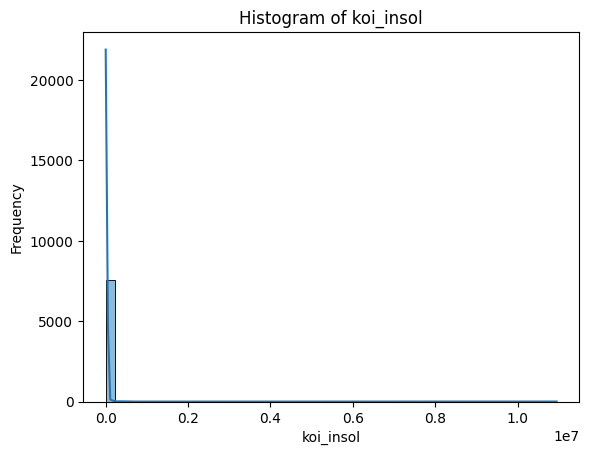

In [101]:
print("Length of unique values in the 'koi_insol' column:", len(kepler['koi_insol'].unique()))

sns.histplot(data = kepler, x = "koi_insol", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_insol')
plt.xlabel('koi_insol')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [102]:
kepler['koi_insol'] = np.log(kepler['koi_insol'])

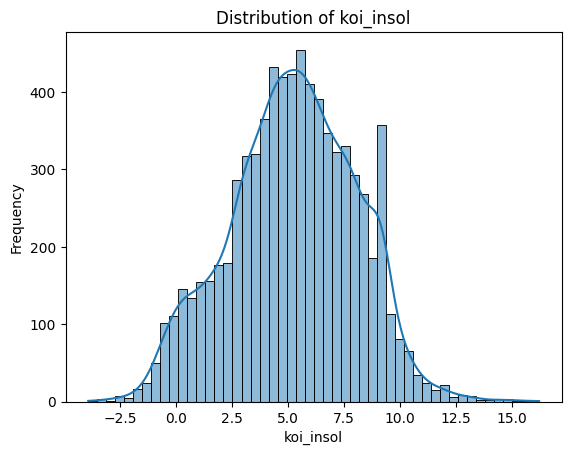

In [103]:
sns.histplot(data = kepler, x = "koi_insol", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_insol')
plt.xlabel('koi_insol')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_insol_err1

Length of unique values in the 'koi_insol_err1' column: 6022


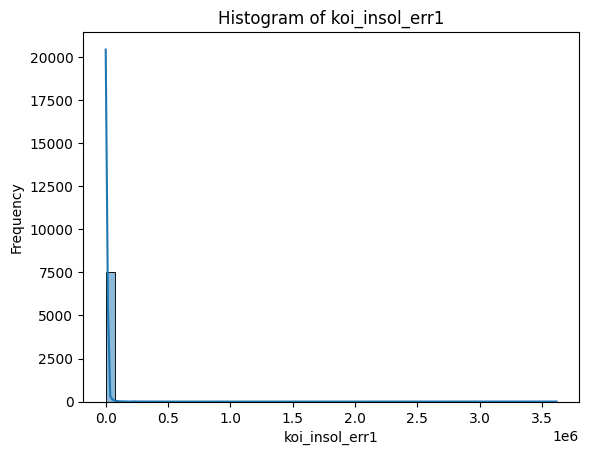

In [104]:
print("Length of unique values in the 'koi_insol_err1' column:", len(kepler['koi_insol_err1'].unique()))

sns.histplot(data = kepler, x = "koi_insol_err1", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_insol_err1')
plt.xlabel('koi_insol_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [105]:
kepler['koi_insol_err1'] = np.log(kepler['koi_insol_err1'])

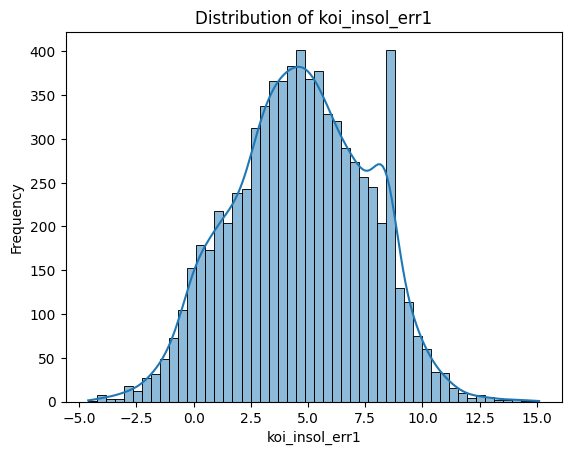

In [106]:
sns.histplot(data = kepler, x = "koi_insol_err1", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_insol_err1')
plt.xlabel('koi_insol_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_insol_err2

Length of unique values in the 'koi_insol_err2' column: 5608


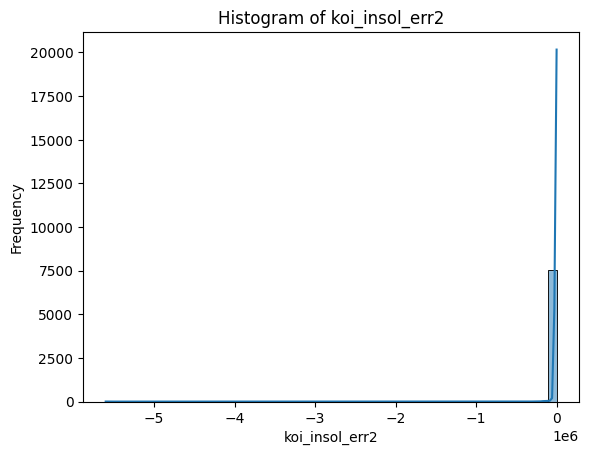

In [107]:
print("Length of unique values in the 'koi_insol_err2' column:", len(kepler['koi_insol_err2'].unique()))

sns.histplot(data = kepler, x = "koi_insol_err2", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_insol_err2')
plt.xlabel('koi_insol_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [108]:
kepler['koi_insol_err2'] = np.exp(kepler['koi_insol_err2'])

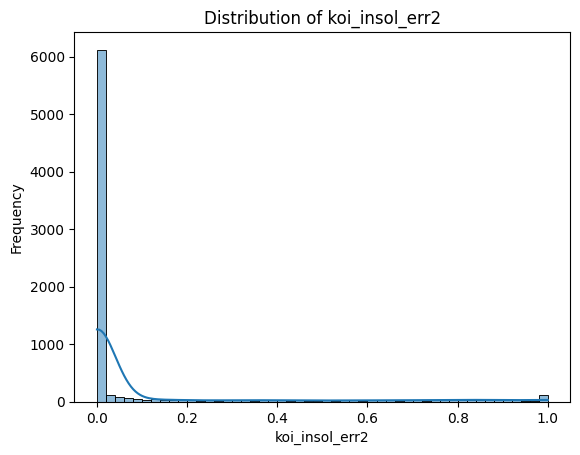

In [109]:
sns.histplot(data = kepler, x = "koi_insol_err2", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_insol_err2')
plt.xlabel('koi_insol_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_model_snr

Length of unique values in the 'koi_model_snr' column: 2646


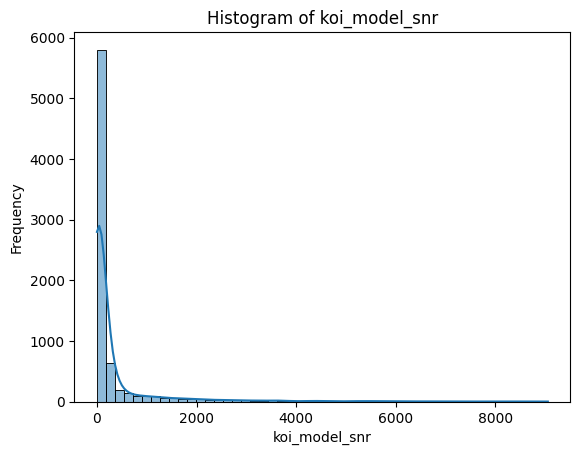

In [110]:
print("Length of unique values in the 'koi_model_snr' column:", len(kepler['koi_model_snr'].unique()))

sns.histplot(data = kepler, x = "koi_model_snr", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_model_snr')
plt.xlabel('koi_model_snr')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [111]:
kepler['koi_model_snr'] = np.log(kepler['koi_model_snr'])

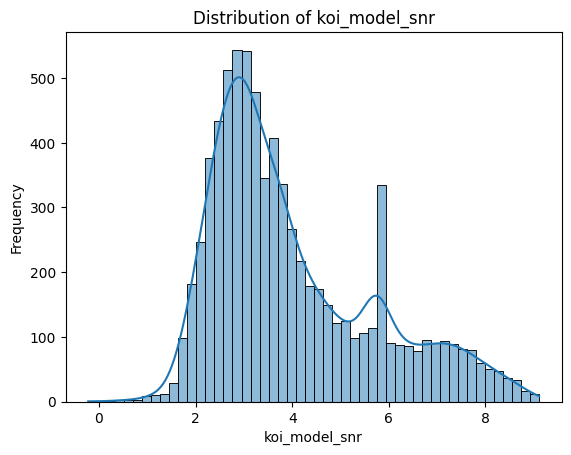

In [112]:
sns.histplot(data = kepler, x = "koi_model_snr", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_model_snr')
plt.xlabel('koi_model_snr')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_steff

Length of unique values in the 'koi_steff' column: 2277


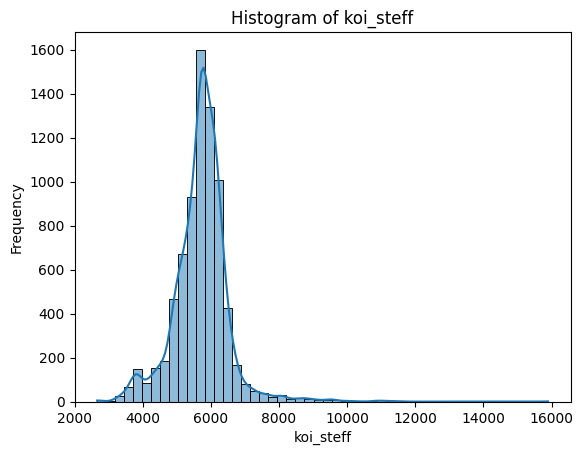

In [113]:
print("Length of unique values in the 'koi_steff' column:", len(kepler['koi_steff'].unique()))

sns.histplot(data = kepler, x = "koi_steff", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_steff')
plt.xlabel('koi_steff')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [114]:
kepler['koi_steff'] = np.log(kepler['koi_steff'])

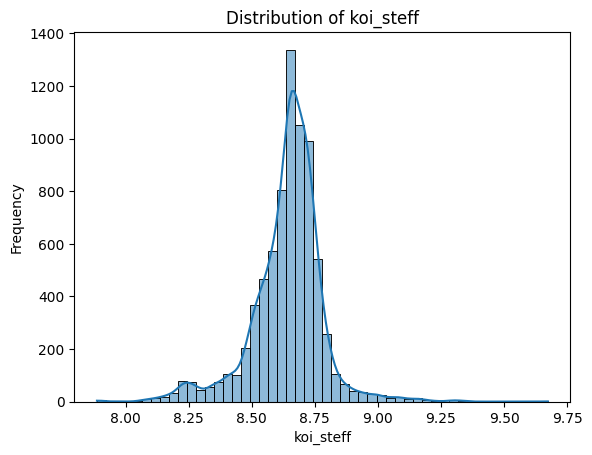

In [115]:
sns.histplot(data = kepler, x = "koi_steff", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_steff')
plt.xlabel('koi_steff')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_steff_err1

Length of unique values in the 'koi_steff_err1' column: 258


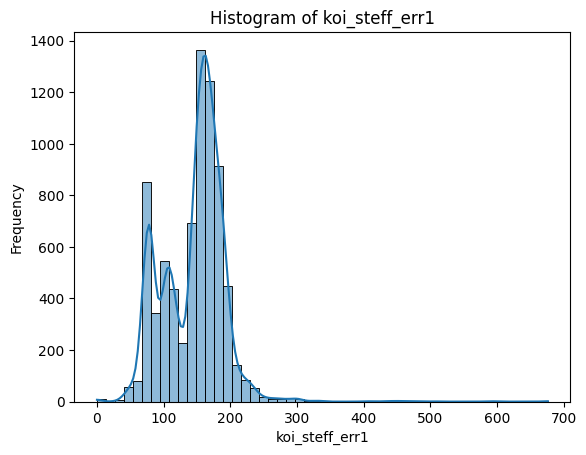

In [116]:
print("Length of unique values in the 'koi_steff_err1' column:", len(kepler['koi_steff_err1'].unique()))

sns.histplot(data = kepler, x = "koi_steff_err1", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_steff_err1')
plt.xlabel('koi_steff_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [117]:
kepler['koi_steff_err1'] = np.log(kepler['koi_steff_err1'])

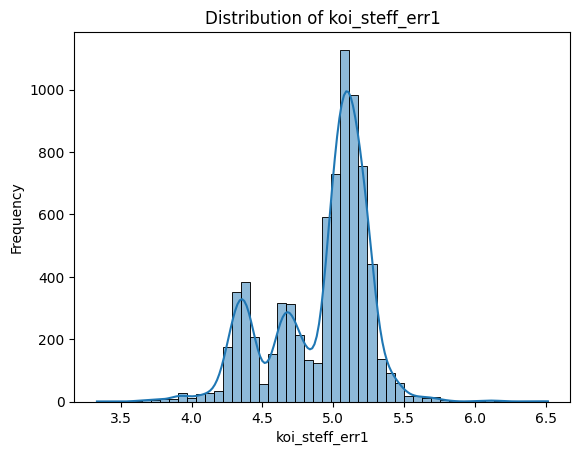

In [118]:
sns.histplot(data = kepler, x = "koi_steff_err1", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_steff_err1')
plt.xlabel('koi_steff_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_steff_err2

Length of unique values in the 'koi_steff_err2' column: 368


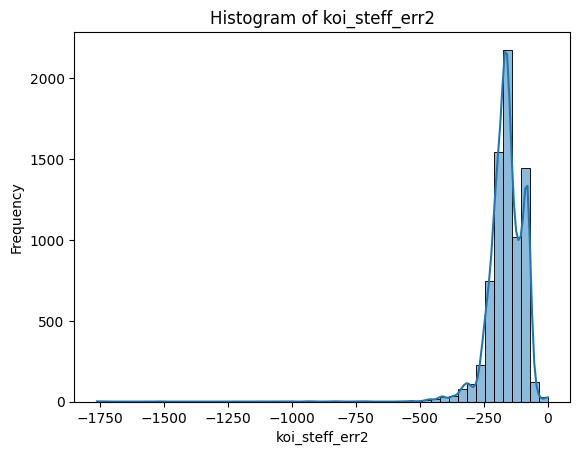

In [119]:
print("Length of unique values in the 'koi_steff_err2' column:", len(kepler['koi_steff_err2'].unique()))

sns.histplot(data = kepler, x = "koi_steff_err2", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_steff_err2')
plt.xlabel('koi_steff_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [120]:
kepler['koi_steff_err2_exp'] = np.exp(kepler['koi_steff_err2'])

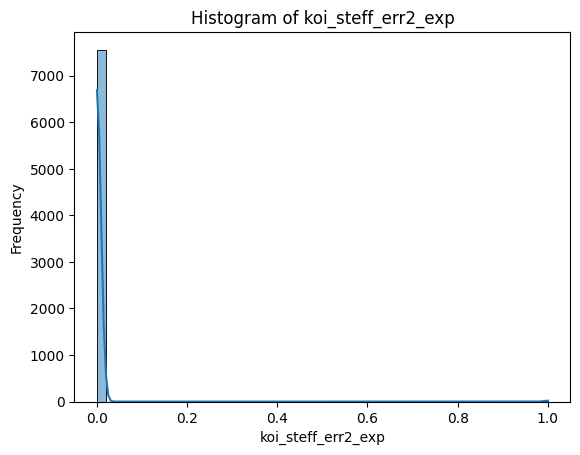

In [121]:
sns.histplot(data = kepler, x = "koi_steff_err2_exp", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_steff_err2_exp')
plt.xlabel('koi_steff_err2_exp')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [122]:
kepler.drop(['koi_steff_err2_exp'], axis=1, inplace=True)

#### koi_slogg

Length of unique values in the 'koi_slogg' column: 1419


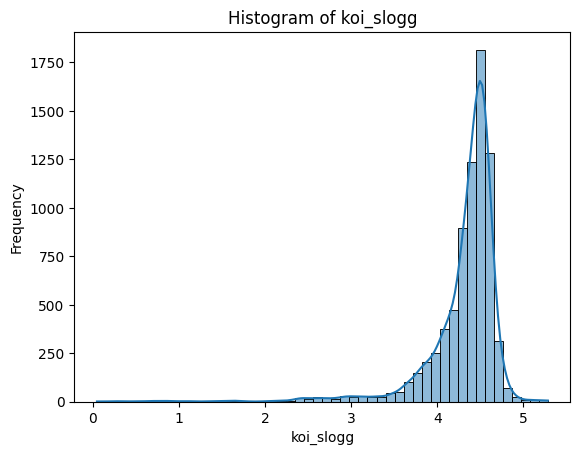

In [123]:
print("Length of unique values in the 'koi_slogg' column:", len(kepler['koi_slogg'].unique()))

sns.histplot(data = kepler, x = "koi_slogg", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_slogg')
plt.xlabel('koi_slogg')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [124]:
kepler['koi_slogg'] = np.exp(kepler['koi_slogg'])

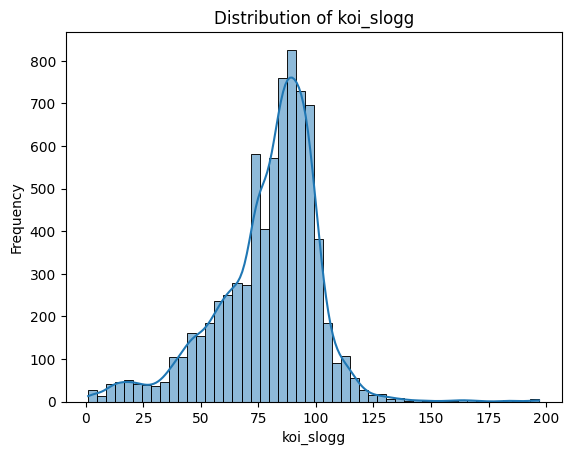

In [125]:
sns.histplot(data = kepler, x = "koi_slogg", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_slogg')
plt.xlabel('koi_slogg')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_slogg_err1

Length of unique values in the 'koi_slogg_err1' column: 508


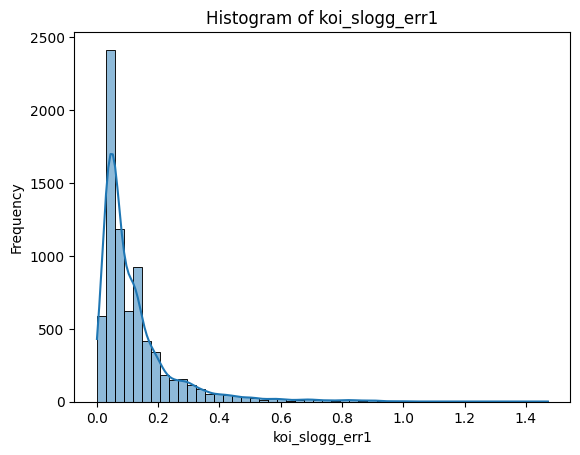

In [126]:
print("Length of unique values in the 'koi_slogg_err1' column:", len(kepler['koi_slogg_err1'].unique()))

sns.histplot(data = kepler, x = "koi_slogg_err1", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_slogg_err1')
plt.xlabel('koi_slogg_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [127]:
kepler['koi_slogg_err1'] = np.log(kepler['koi_slogg_err1'])

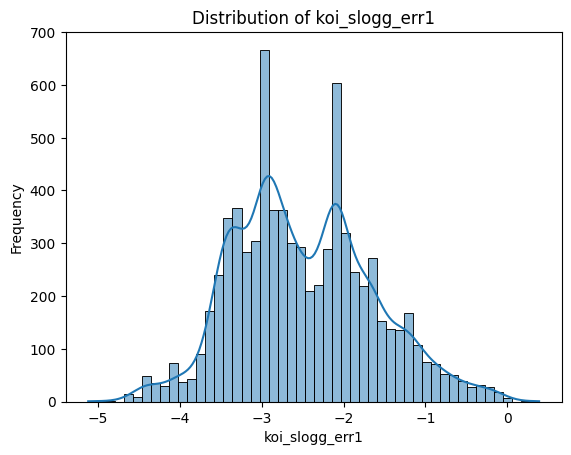

In [128]:
sns.histplot(data = kepler, x = "koi_slogg_err1", discrete = False, kde = True, bins= 50)
plt.title('Distribution of koi_slogg_err1')
plt.xlabel('koi_slogg_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_slogg_err2

Length of unique values in the 'koi_slogg_err2' column: 397


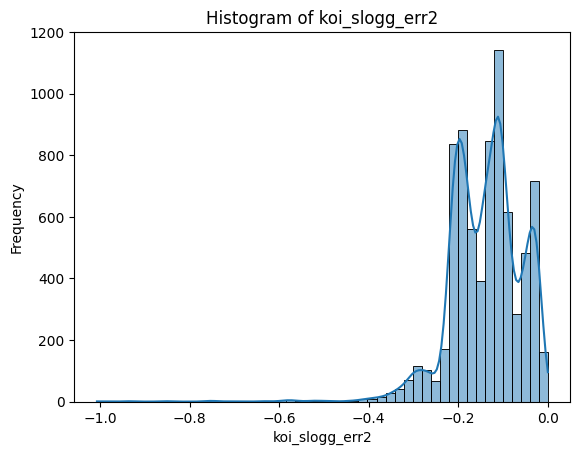

In [129]:
print("Length of unique values in the 'koi_slogg_err2' column:", len(kepler['koi_slogg_err2'].unique()))

sns.histplot(data = kepler, x = "koi_slogg_err2", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_slogg_err2')
plt.xlabel('koi_slogg_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [130]:
kepler['koi_slogg_err2_log'] = np.log(kepler['koi_slogg_err2'])

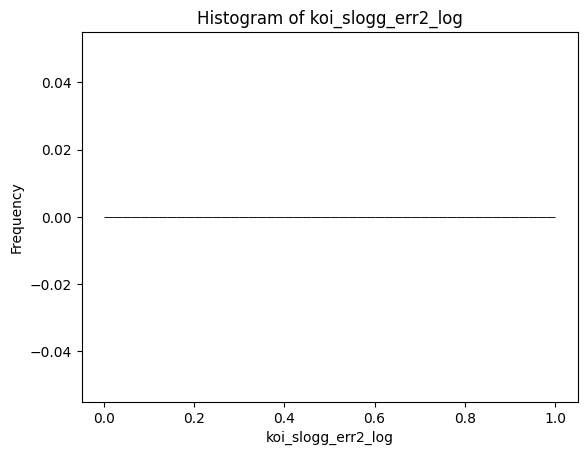

In [131]:
sns.histplot(data = kepler, x = "koi_slogg_err2_log", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_slogg_err2_log')
plt.xlabel('koi_slogg_err2_log')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [132]:
kepler['koi_slogg_err2_exp'] = np.exp(kepler['koi_slogg_err2'])

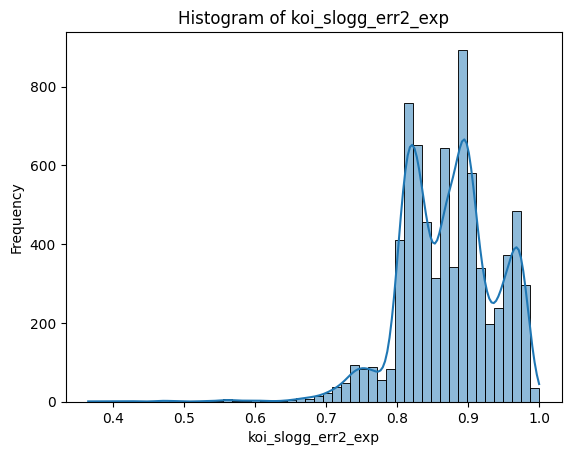

In [133]:
sns.histplot(data = kepler, x = "koi_slogg_err2_exp", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_slogg_err2_exp')
plt.xlabel('koi_slogg_err2_exp')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [134]:
kepler['koi_slogg_err2'] = np.exp(kepler['koi_slogg_err2'])
kepler = kepler.drop(['koi_slogg_err2_log', 'koi_slogg_err2_exp'], axis=1)

#### koi_srad

Length of unique values in the 'koi_srad' column: 2067


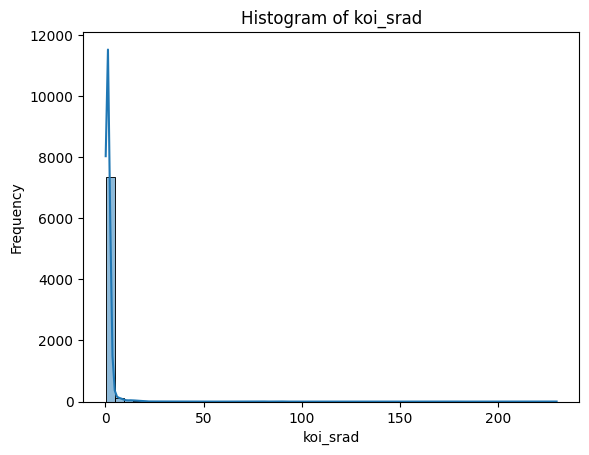

In [135]:
print("Length of unique values in the 'koi_srad' column:", len(kepler['koi_srad'].unique()))

sns.histplot(data = kepler, x = "koi_srad", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_srad')
plt.xlabel('koi_srad')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [136]:
kepler['koi_srad'] = np.log(kepler['koi_srad'])

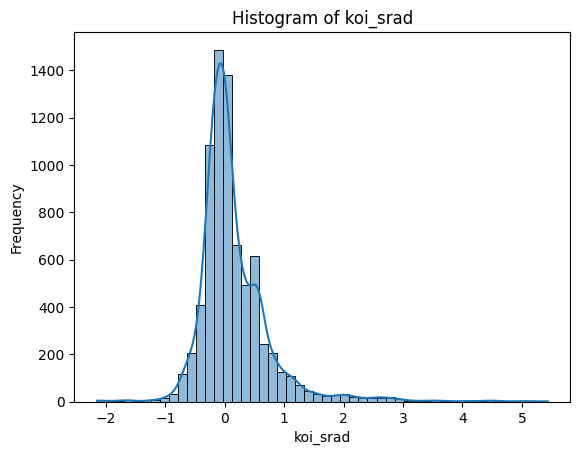

In [137]:
sns.histplot(data = kepler, x = "koi_srad", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_srad')
plt.xlabel('koi_srad')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_srad_err1

Length of unique values in the 'koi_srad_err1' column: 1044


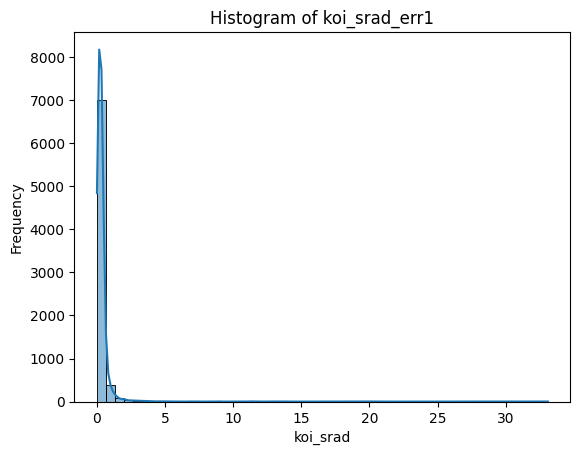

In [138]:
print("Length of unique values in the 'koi_srad_err1' column:", len(kepler['koi_srad_err1'].unique()))

sns.histplot(data = kepler, x = "koi_srad_err1", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_srad_err1')
plt.xlabel('koi_srad')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [139]:
kepler['koi_srad_err1'] = np.log(kepler['koi_srad_err1'])

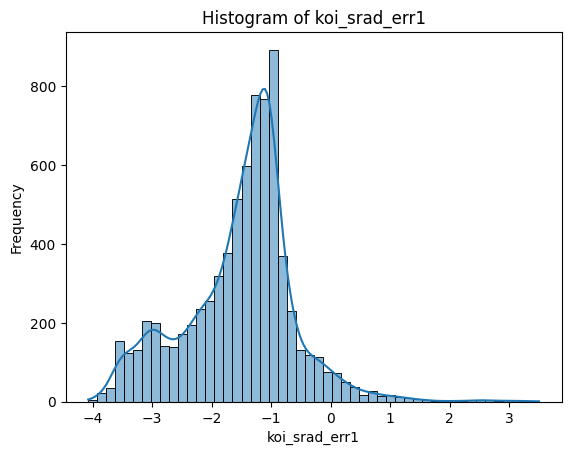

In [140]:
sns.histplot(data = kepler, x = "koi_srad_err1", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_srad_err1')
plt.xlabel('koi_srad_err1')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_srad_err2

Length of unique values in the 'koi_srad_err2' column: 1225


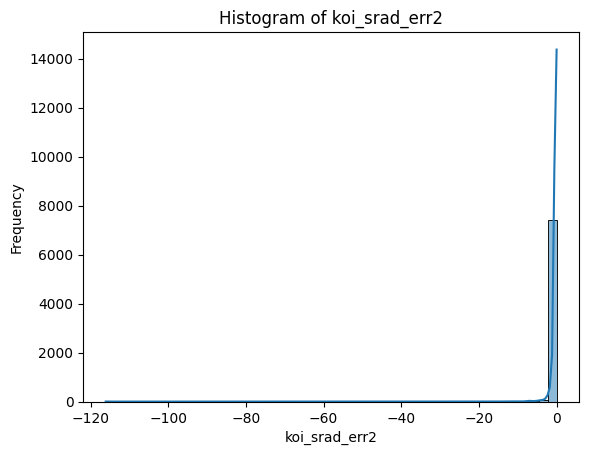

In [141]:
print("Length of unique values in the 'koi_srad_err2' column:", len(kepler['koi_srad_err2'].unique()))

sns.histplot(data = kepler, x = "koi_srad_err2", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_srad_err2')
plt.xlabel('koi_srad_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [142]:
kepler['koi_srad_err2'] = np.exp(kepler['koi_srad_err2'])

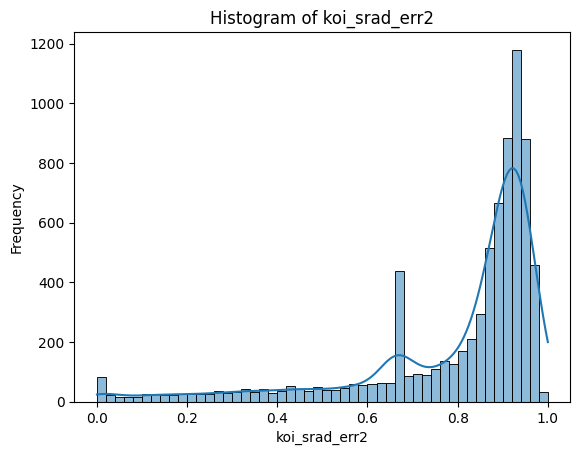

In [143]:
sns.histplot(data = kepler, x = "koi_srad_err2", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_srad_err2')
plt.xlabel('koi_srad_err2')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### koi_kepmag

Length of unique values in the 'koi_kepmag' column: 3555


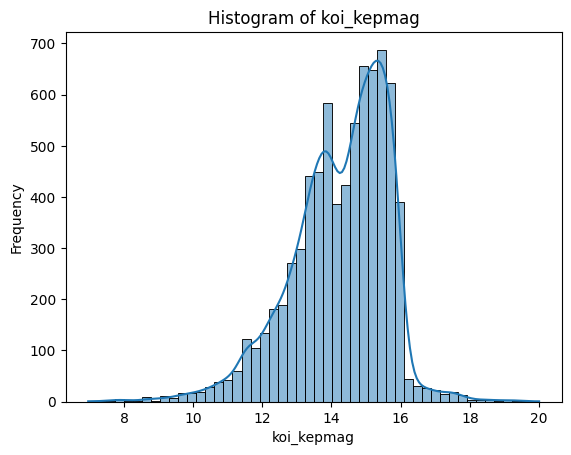

In [144]:
print("Length of unique values in the 'koi_kepmag' column:", len(kepler['koi_kepmag'].unique()))

sns.histplot(data = kepler, x = "koi_kepmag", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_kepmag')
plt.xlabel('koi_kepmag')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [145]:
kepler['koi_kepmag_log'] = np.log(kepler['koi_kepmag'])

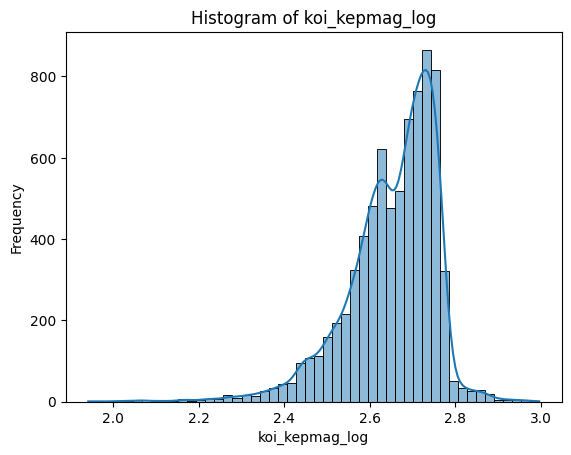

In [146]:
sns.histplot(data = kepler, x = "koi_kepmag_log", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_kepmag_log')
plt.xlabel('koi_kepmag_log')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [147]:
kepler['koi_kepmag_exp'] = np.exp(kepler['koi_kepmag'])

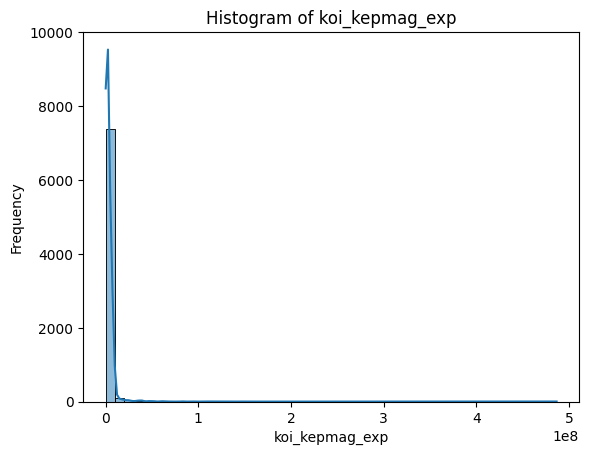

In [148]:
sns.histplot(data = kepler, x = "koi_kepmag_exp", discrete = False, kde = True, bins= 50)
plt.title('Histogram of koi_kepmag_exp')
plt.xlabel('koi_kepmag_exp')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [149]:
kepler['koi_kepmag'] = np.log(kepler['koi_kepmag'])
kepler = kepler.drop(['koi_kepmag_log', 'koi_kepmag_exp'], axis=1)

### Convertion

In [150]:
object_columns = kepler.select_dtypes(include=['object']).columns
print(object_columns)

Index(['koi_disposition', 'koi_tce_delivname', 'ra_str', 'dec_str'], dtype='object')


##### koi_tce_delivname

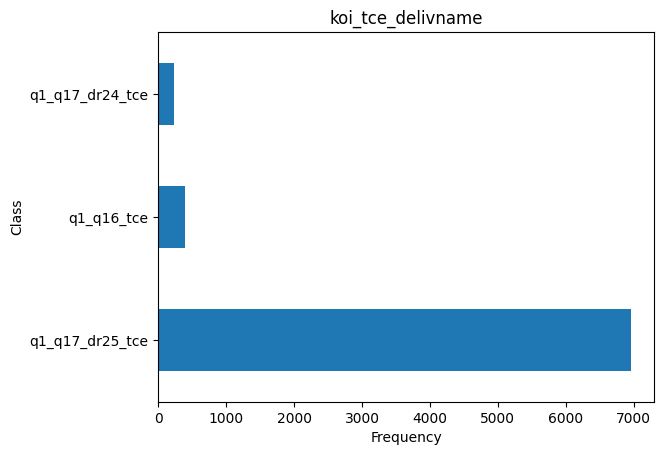

In [151]:
# Plotting the horizontal bar chart
kepler.koi_tce_delivname.value_counts().plot(kind='barh')
# Adding title, x-label, and y-label
plt.title('koi_tce_delivname')
plt.xlabel('Frequency')
plt.ylabel('Class')
# Display the plot
plt.show()

"koi_tce_delivname" column has only one unique valus so I can drop that.

In [152]:
kepler = kepler.drop(['koi_tce_delivname'],axis=1).reset_index(drop=True)

##### ra_str

In [153]:
print("Unique values are: ",kepler.ra_str.unique())

print("Number of Unique values are: ", len(kepler.ra_str.unique()))

Unique values are:  ['19h27m44.22s' '19h02m08.31s' '19h15m01.17s' ... '19h48m45.30s'
 '19h36m39.57s' '19h48m02.34s']
Number of Unique values are:  6570


In [154]:
# Function to convert sexagesimal string to decimal degrees
def sexagesimal_to_degrees(sexagesimal):
    parts = sexagesimal.split('h')
    hours = float(parts[0])
    parts = parts[1].split('m')
    minutes = float(parts[0])
    parts = parts[1].split('s')
    seconds = float(parts[0])

    degrees = hours * 15 + minutes * 0.25 + seconds * (1/240)
    return degrees

# Apply the conversion function to the "ra_str" column
kepler['ra_deg'] = kepler['ra_str'].apply(sexagesimal_to_degrees)
# Now you have a new column "ra_deg" with the Right Ascension in decimal degrees

In [155]:
# Display the DataFrame with the new numeric 'dec_numeric' column
print(kepler[['ra_str', 'ra_deg']])

            ra_str      ra_deg
0     19h27m44.22s  291.934250
1     19h27m44.22s  291.934250
2     19h02m08.31s  285.534625
3     19h15m01.17s  288.754875
4     19h45m08.67s  296.286125
...            ...         ...
7575  19h23m44.63s  290.935958
7576  19h54m59.81s  298.749208
7577  19h48m45.30s  297.188750
7578  19h36m39.57s  294.164875
7579  19h48m02.34s  297.009750

[7580 rows x 2 columns]


In [156]:
# Droping the 'ra_str' column
kepler = kepler.drop(['ra_str'],axis=1).reset_index(drop=True)

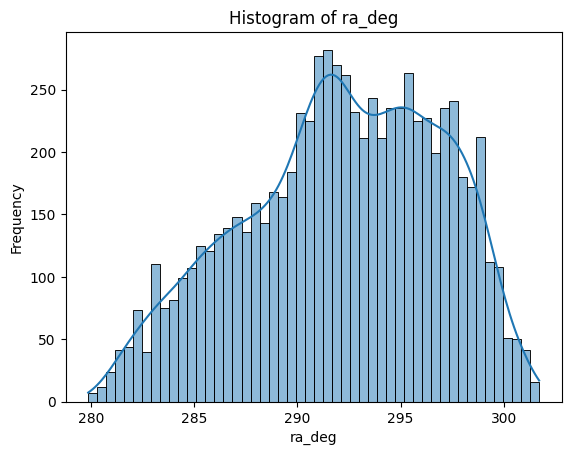

In [157]:
sns.histplot(data = kepler, x = "ra_deg", discrete = False, kde = True, bins= 50)
plt.title('Histogram of ra_deg')
plt.xlabel('ra_deg')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [158]:
kepler['ra_deg_log']= np.log(kepler['ra_deg'])

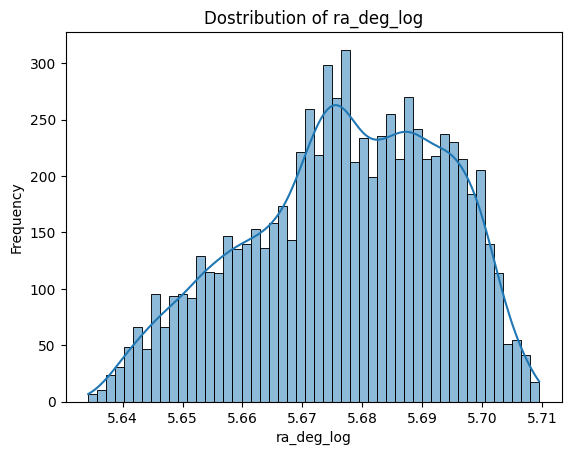

In [159]:
sns.histplot(data = kepler, x = "ra_deg_log", discrete = False, kde = True, bins= 50)
plt.title('Dostribution of ra_deg_log')
plt.xlabel('ra_deg_log')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [160]:
kepler['ra_deg_exp']= np.exp(kepler['ra_deg'])

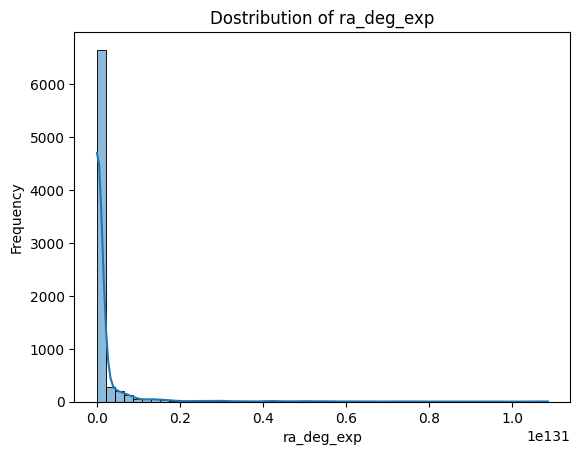

In [161]:
sns.histplot(data = kepler, x = "ra_deg_exp", discrete = False, kde = True, bins= 50)
plt.title('Dostribution of ra_deg_exp')
plt.xlabel('ra_deg_exp')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [162]:
kepler['ra_deg'] = np.log(kepler['ra_deg'])
kepler = kepler.drop(['ra_deg_log', 'ra_deg_exp'], axis=1)

##### dec_str

In [163]:
# Extract numeric components from the 'dec_str' column
kepler['dec_day'] = kepler['dec_str'].str.extract(r'([+-]?\d+)d').astype(float)
kepler['dec_min'] = kepler['dec_str'].str.extract(r'(\d+)m').astype(float)
kepler['dec_sec'] = kepler['dec_str'].str.extract(r'(\d+\.\d+)s').astype(float)

In [164]:
# Convert to decimal degrees
kepler['dec_deg'] = kepler['dec_day'] + kepler['dec_min'] / 60 + kepler['dec_sec'] / 3600
kepler['dec_deg']

0       48.141639
1       48.141639
2       48.285222
3       48.226194
4       48.224667
          ...    
7575    47.290722
7576    46.973361
7577    47.093806
7578    47.176278
7579    47.121028
Name: dec_deg, Length: 7580, dtype: float64

In [165]:
# Drop intermediate columns if needed
kepler = kepler.drop(['dec_day', 'dec_min', 'dec_sec'], axis=1)

# Display the DataFrame with the new numeric 'dec_numeric' column
print(kepler[['dec_str', 'dec_deg']])

           dec_str    dec_deg
0     +48d08m29.9s  48.141639
1     +48d08m29.9s  48.141639
2     +48d17m06.8s  48.285222
3     +48d13m34.3s  48.226194
4     +48d13m28.8s  48.224667
...            ...        ...
7575  +47d17m26.6s  47.290722
7576  +46d58m24.1s  46.973361
7577  +47d05m37.7s  47.093806
7578  +47d10m34.6s  47.176278
7579  +47d07m15.7s  47.121028

[7580 rows x 2 columns]


In [166]:
# Droping the 'dec_str' column
kepler = kepler.drop(['dec_str'],axis=1).reset_index(drop=True)

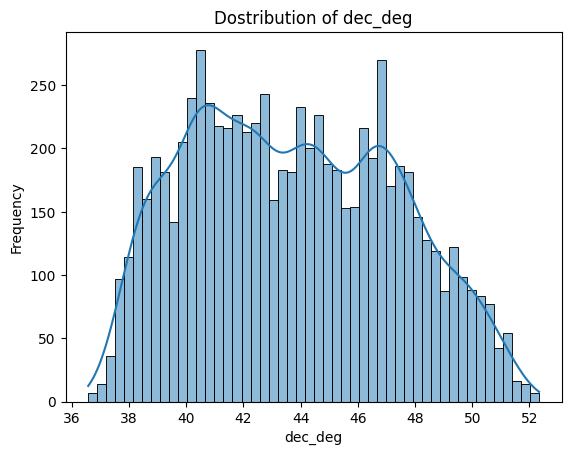

In [167]:
sns.histplot(data = kepler, x = "dec_deg", discrete = False, kde = True, bins= 50)
plt.title('Dostribution of dec_deg')
plt.xlabel('dec_deg')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [168]:
pd.set_option('display.max_columns', None)
# Display the first 5 rows of the DataFrame
kepler.sample(10)

koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
7109  FALSE POSITIVE              0              0              0   
6354  FALSE POSITIVE              0              1              0   
1892  FALSE POSITIVE              0              0              0   
367   FALSE POSITIVE              0              1              1   
115        CONFIRMED              0              0              0   
4870  FALSE POSITIVE              0              1              0   
259        CONFIRMED              0              0              0   
5265  FALSE POSITIVE              1              0              0   
6073  FALSE POSITIVE              1              0              0   
1334       CONFIRMED              0              0              0   

      koi_fpflag_ec  koi_period  koi_period_err1  koi_period_err2  \
7109              1    0.288305       -10.729024         0.999978   
6354              0    0.333333       -16.304425         1.000000   
1892              0    2.445013        -7.989216         0.999661   
367               1    2.960746        -9.371684         0.999915   
115               0    2.348773       -11.493123         0.999990   
4870              0    3.031492       -11.049191         0.999984   
259               0    3.006733       -11.473705         0.999990   
5265              0    4.173756        -6.318744         0.998199   
6073              0    3.699585        -4.437962         0.988250   
1334              0    3.813360        -7.155960         0.999220   

      koi_time0bk  koi_time0bk_err1  koi_time0bk_err2  koi_impact  \
7109     4.883410         -3.151538          0.981670   -0.632993   
6354     4.879403         -5.722947          0.999951   -0.515838   
1892     4.897436         -3.151538          0.981670   -1.598004   
367      4.895051         -4.352946          0.998052    0.219938   
115      5.156835         -4.855919          0.999392   -0.368169   
4870     5.068387         -5.133592          0.999705    0.088926   
259      5.330769         -5.269416          0.999798   -2.780621   
5265     5.490081         -3.621349          0.991781   -0.279652   
6073     5.434864         -2.271439          0.932767   -0.022450   
1334     5.019839         -4.079074          0.996556   -0.213193   

      koi_impact_err1  koi_impact_err2  koi_duration  koi_duration_err1  \
7109        -0.823256         0.723974      1.123630          -1.339411   
6354        -5.115996         0.993024      1.834702          -5.079985   
1892        -1.322381         0.816932      1.402168          -0.785262   
367          4.257030         0.903030      1.555404          -2.292635   
115         -3.411248         0.936131      1.199031          -2.741090   
4870        -1.187444         0.886920      0.794485          -4.092347   
259         -2.273026         0.958870      1.876284          -4.970454   
5265         0.728221         0.721602      2.203869          -1.233510   
6073        -3.798694         0.507175      0.314811           0.875469   
1334        -2.180367         0.562705      1.704566          -1.973281   

      koi_duration_err2  koi_depth  koi_depth_err1  koi_depth_err2  koi_prad  \
7109           0.769511   4.241327        1.887070    1.360368e-03 -0.198451   
6354           0.993799  13.462314        5.910797   5.563347e-161  5.381049   
1892           0.633814   8.258163        6.272877   6.666910e-231  1.786747   
367            0.903933   7.146693        3.238678    8.423464e-12  3.653252   
115            0.937536   9.638023        4.736198    3.093350e-50  2.398804   
4870           0.983439   8.591614        3.589059    1.899065e-16  2.880321   
259            0.993084   9.659108        3.194583    2.530548e-11  2.396075   
5265           0.747315  10.293804        4.962116    8.732440e-63  4.646636   
6073           0.090718   4.587006        2.873565    2.055832e-08  1.105257   
1334           0.870228   7.334395        3.860730    2.349698e-21  1.283708   

      koi_prad_err

In [169]:
# Print the Numeric Columns
numList = list(kepler.select_dtypes(include=['int64', 'float64']).columns)
print(numList)
print("Total number of numeric columns:", len(numList))

['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'koi_kepmag', 'ra_deg', 'dec_deg']
Total number of numeric columns: 40


In [170]:
# Apply the Anderson-Darling Test on each numeric column
for column in numList:
    # Perform the Anderson-Darling test
    result = anderson(kepler[column])

    # Print the result
    print(f"\nColumn: {column}")
    print(f"Anderson-Darling Statistic: {result.statistic}")

    # Check if the data follows a normal distribution based on the 5% significance level
    if result.statistic > result.critical_values[2]:
        print("The data does not follow a normal distribution.")
    else:
        print("The data \033[1mfollows a normal distribution\033[0m.")


Column: koi_fpflag_nt
Anderson-Darling Statistic: 2590.943594507007
The data does not follow a normal distribution.

Column: koi_fpflag_ss
Anderson-Darling Statistic: 1673.8554651573959
The data does not follow a normal distribution.

Column: koi_fpflag_co
Anderson-Darling Statistic: 1822.0015199404497
The data does not follow a normal distribution.

Column: koi_fpflag_ec
Anderson-Darling Statistic: 2242.1299172684594
The data does not follow a normal distribution.

Column: koi_period
Anderson-Darling Statistic: 27.084928194769418
The data does not follow a normal distribution.

Column: koi_period_err1
Anderson-Darling Statistic: 27.373850202891845
The data does not follow a normal distribution.

Column: koi_period_err2
Anderson-Darling Statistic: 2137.649424776153
The data does not follow a normal distribution.

Column: koi_time0bk
Anderson-Darling Statistic: 942.0385072392528
The data does not follow a normal distribution.

Column: koi_time0bk_err1
Anderson-Darling Statistic: 24.342

In [171]:
# Apply the Shapiro-Wilk Test on each numeric column
for column in numList:
    # Perform the Shapiro-Wilk test
    stat, p_value = shapiro(kepler[column])

    # Print the result
    print(f"\nColumn: {column}")
    print(f"Shapiro-Wilk Statistic: {stat}")
    print(f"P-value: {p_value}")

    # Check if the data follows a normal distribution based on the 5% significance level
    if p_value > 0.05:
        print("The data \033[1mfollows a normal distribution\033[0m.")
    else:
        print("The data does not follow a normal distribution.")


Column: koi_fpflag_nt
Shapiro-Wilk Statistic: 0.009640573086473259
P-value: 4.3432941266850124e-107
The data does not follow a normal distribution.

Column: koi_fpflag_ss
Shapiro-Wilk Statistic: 0.5713590696772681
P-value: 6.565350136718846e-87
The data does not follow a normal distribution.

Column: koi_fpflag_co
Shapiro-Wilk Statistic: 0.5378898249485771
P-value: 1.2394457073784953e-88
The data does not follow a normal distribution.

Column: koi_fpflag_ec
Shapiro-Wilk Statistic: 0.42845411625365926
P-value: 1.3365172647248716e-93
The data does not follow a normal distribution.

Column: koi_period
Shapiro-Wilk Statistic: 0.9781179776597688
P-value: 1.5051979609254577e-32
The data does not follow a normal distribution.

Column: koi_period_err1
Shapiro-Wilk Statistic: 0.9869071095134199
P-value: 6.775100112453107e-26
The data does not follow a normal distribution.

Column: koi_period_err2
Shapiro-Wilk Statistic: 0.23732225353867786
P-value: 1.4545504970001399e-100
The data does not fol

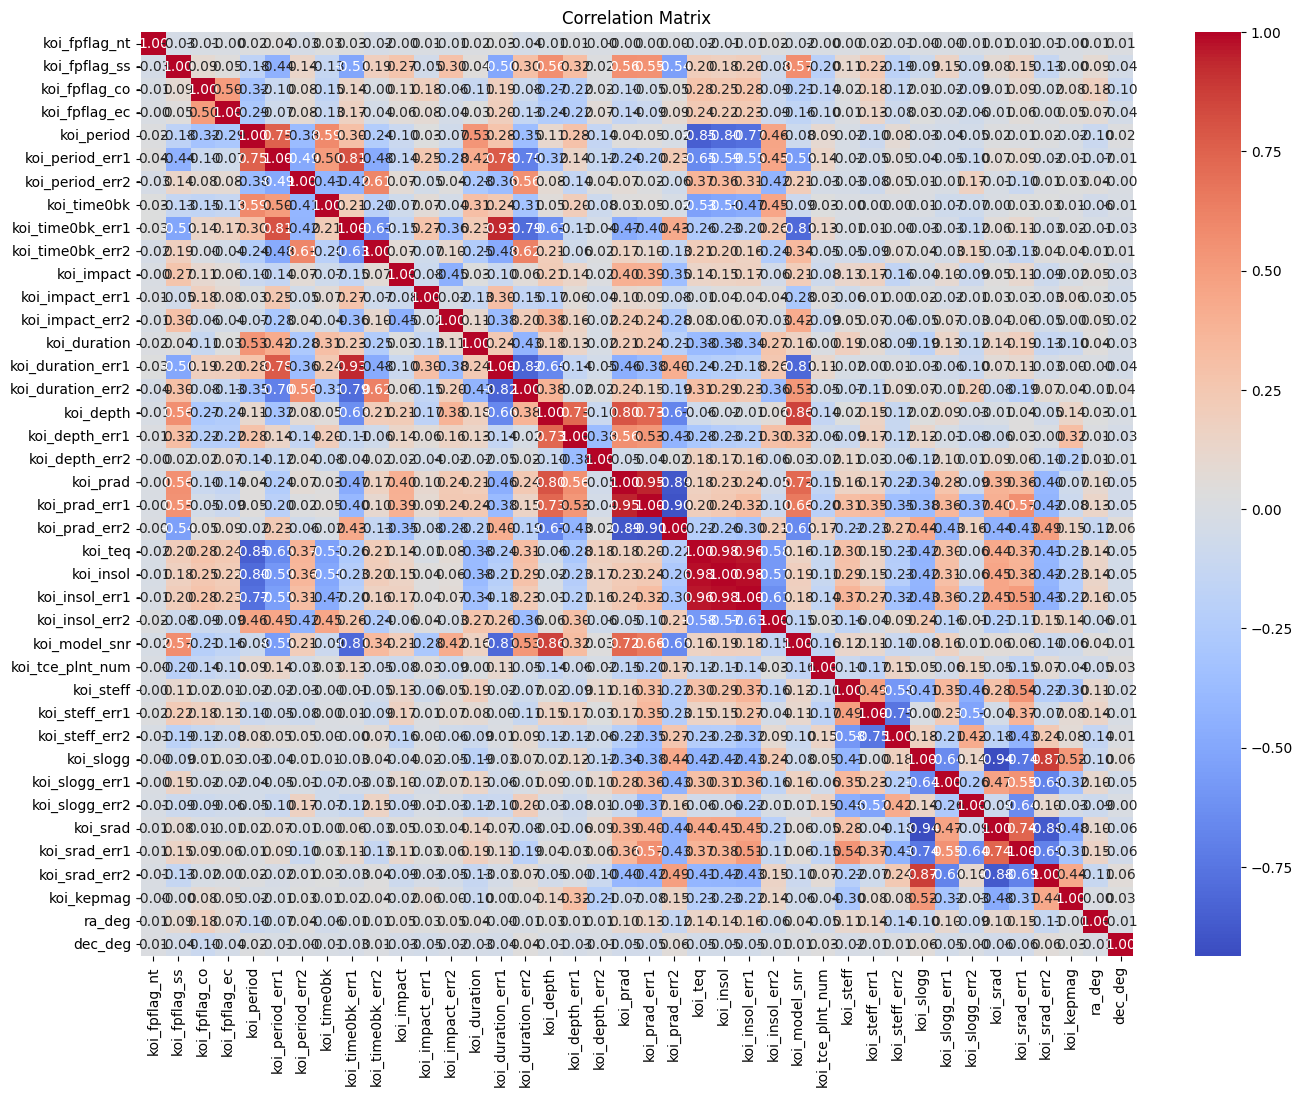

In [172]:
# Calculate and display the correlation matrix for numeric columns only
numeric_kepler = kepler.select_dtypes(include=[np.number])
corr_matrix = numeric_kepler.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [173]:
# encoding labels by replacing values with 0 and 1
kepler['koi_disposition']=kepler['koi_disposition'].replace({'FALSE POSITIVE': 0, 'CONFIRMED': 1})

In [174]:
# checking for infinite and missing values
print("Missing values in X_train:", kepler.isnull().sum().sum())
print("Infinite values in X_train:", np.isinf(kepler).sum().sum())

Missing values in X_train: 0
Infinite values in X_train: 309


In [175]:
kepler.isnull().sum()

koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
koi_kepmag           0
ra_deg               0
dec_deg              0
dtype: int64

In [176]:
# Replace Infinite Values
kepler.replace([np.inf, -np.inf], np.nan, inplace=True)
#Remove Rows with Infinite Values:
kepler.dropna(inplace=True)

In [177]:
kepler.shape

(7408, 41)

Confirmed count after imputation: 2724
False Positive count after imputation: 4684


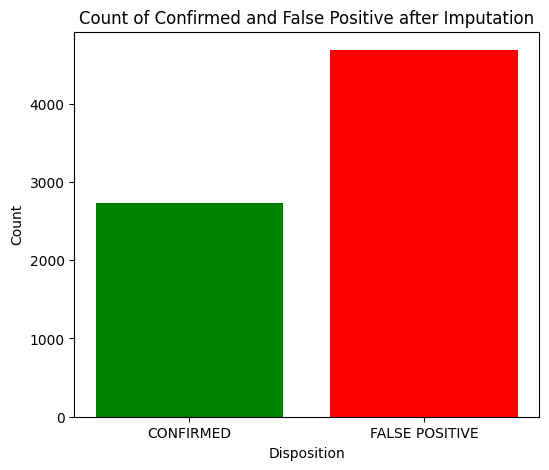

In [178]:
confirmed_count_after_removal = kepler[kepler['koi_disposition'] == 1].shape[0]
false_positive_count_after_removal = kepler[kepler['koi_disposition'] == 0].shape[0]

print("Confirmed count after imputation:", confirmed_count_after_removal)
print("False Positive count after imputation:", false_positive_count_after_removal)

# Plotting the counts
counts = [confirmed_count_after_removal, false_positive_count_after_removal]
labels = ['CONFIRMED', 'FALSE POSITIVE']
plt.figure(figsize=(6, 5))
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.title('Count of Confirmed and False Positive after Imputation')
plt.show()

In [179]:
# Separting dependent and independent values
X= kepler.drop(['koi_disposition'],axis=1)
Y = kepler['koi_disposition']

In [180]:
X = X.apply(np.float64) # converting X to float

In [181]:
#X.info()

In [182]:
Y.head(10)

0    1
1    1
2    0
3    1
4    1
5    1
6    1
7    0
8    1
9    1
Name: koi_disposition, dtype: int64

#### Training and Testing

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)  # dividing data into train and test set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5926, 40), (1482, 40), (5926,), (1482,))

#### LogisticRegression

In [184]:
model_1 = LogisticRegression()   #implementing Logistic Regression
model_1.fit(X_train, y_train)    # fit function to train the data

LogisticRegression()

The accuracy is: 94.33
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       958
           1       0.91      0.94      0.92       524

    accuracy                           0.94      1482
   macro avg       0.94      0.94      0.94      1482
weighted avg       0.94      0.94      0.94      1482

F1 Score: 0.9212007504690432


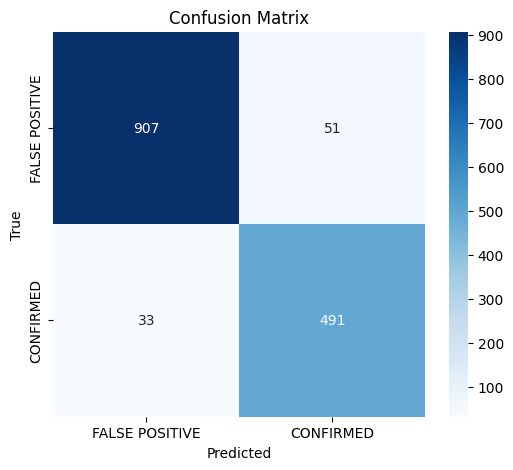

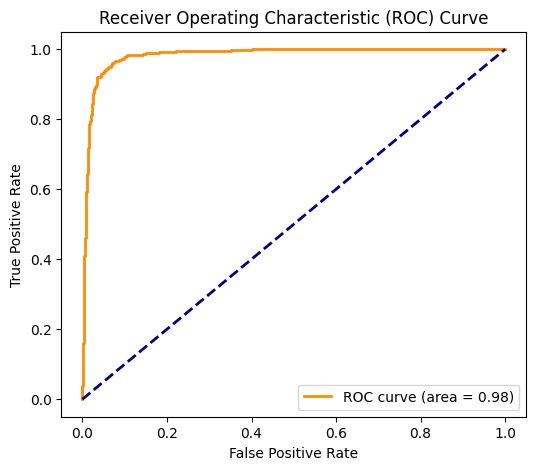

In [185]:
pred= model_1.predict(X_test)               # predict function to make the predictiona
acc = accuracy_score(y_test, pred)*100            # accuracy_score to geneate accuracy score
print("The accuracy is: {:.2f}".format(acc))

y_pred = model_1.predict(X_test)

# Print full classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Define class labels
class_labels = ['FALSE POSITIVE', 'CONFIRMED']

# Assuming y_pred is defined
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with modified labels
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Get predicted probabilities for the positive class
y_prob = model_1.predict_proba(X_test)[:, 1]


# Compute ROC curve and AUCA
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [186]:
# Create a dataframe to store the score of different models.
score = pd.DataFrame()

# Adding a row using concat
new_row = pd.DataFrame([['logisticRegression', acc]], columns=['Model', 'Accuracy'])
score = pd.concat([score, new_row], ignore_index=True)

# Display the score DataFrame
print(score)

                Model   Accuracy
0  logisticRegression  94.331984


#### eXtreme Gradient Boosting

In [187]:
xgb = XGBClassifier(random_state=369) #Implementing xgboost model
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

The accuracy is: 99.53
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       958
           1       1.00      0.99      0.99       524

    accuracy                           1.00      1482
   macro avg       1.00      0.99      0.99      1482
weighted avg       1.00      1.00      1.00      1482

F1 Score: 0.9933014354066986


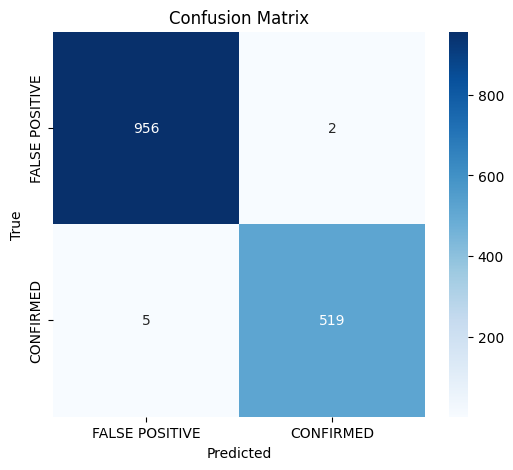

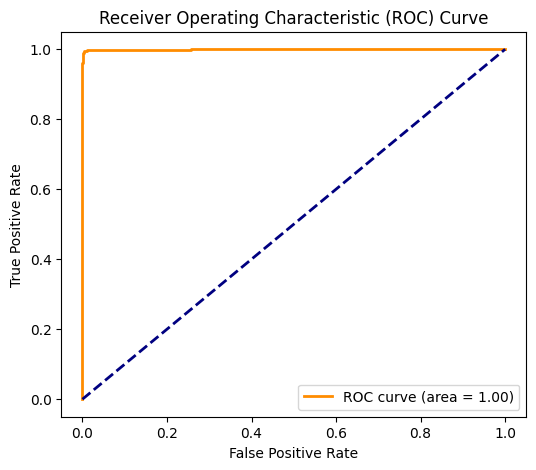

In [188]:
pred= xgb.predict(X_test)               # predict function to makke the prediction
acc = accuracy_score(y_test, pred)*100            # accuracy_score to geneate accuracy score
print("The accuracy is: {:.2f}".format(acc))

y_pred = xgb.predict(X_test)

# Print full classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Define class labels
class_labels = ['FALSE POSITIVE', 'CONFIRMED']

# Assuming y_pred is defined
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with modified labels
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Get predicted probabilities for the positive class
y_prob = xgb.predict_proba(X_test)[:, 1]


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [189]:
# Adding new model accuracy
new_row = pd.DataFrame([['XGBClassifier', acc]], columns=['Model', 'Accuracy'])
score = pd.concat([score, new_row], ignore_index=True)

# Display the score DataFrame
print(score)

                Model   Accuracy
0  logisticRegression  94.331984
1       XGBClassifier  99.527665


#### CatBoostClassifier

In [190]:
cat = CatBoostClassifier(random_state=369) #Implementing catboost model
cat.fit(X_train, y_train)

Learning rate set to 0.022024
0:	learn: 0.6498012	total: 139ms	remaining: 2m 18s
1:	learn: 0.5949773	total: 146ms	remaining: 1m 12s
2:	learn: 0.5559413	total: 153ms	remaining: 50.7s
3:	learn: 0.5091692	total: 159ms	remaining: 39.5s
4:	learn: 0.4747292	total: 165ms	remaining: 32.9s
5:	learn: 0.4390321	total: 172ms	remaining: 28.5s
6:	learn: 0.4117775	total: 179ms	remaining: 25.4s
7:	learn: 0.3814827	total: 185ms	remaining: 23s
8:	learn: 0.3545664	total: 192ms	remaining: 21.1s
9:	learn: 0.3309013	total: 199ms	remaining: 19.7s
10:	learn: 0.3085100	total: 206ms	remaining: 18.5s
11:	learn: 0.2875985	total: 213ms	remaining: 17.5s
12:	learn: 0.2691807	total: 219ms	remaining: 16.6s
13:	learn: 0.2532098	total: 226ms	remaining: 15.9s
14:	learn: 0.2372339	total: 233ms	remaining: 15.3s
15:	learn: 0.2203524	total: 239ms	remaining: 14.7s
16:	learn: 0.2079351	total: 245ms	remaining: 14.2s
17:	learn: 0.1939566	total: 251ms	remaining: 13.7s
18:	learn: 0.1818018	total: 257ms	remaining: 13.3s
19:	learn: 

The accuracy is: 99.46
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       958
           1       0.99      0.99      0.99       524

    accuracy                           0.99      1482
   macro avg       0.99      0.99      0.99      1482
weighted avg       0.99      0.99      0.99      1482

F1 Score: 0.9923664122137404


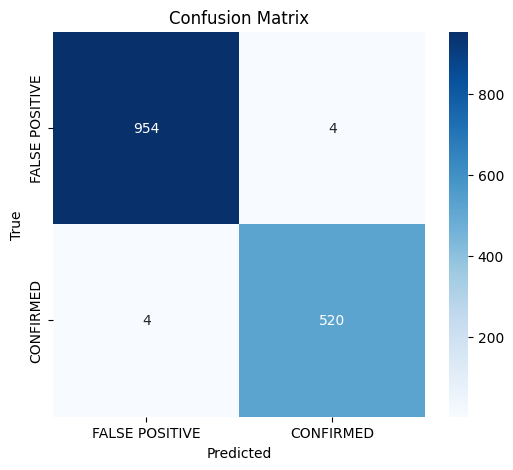

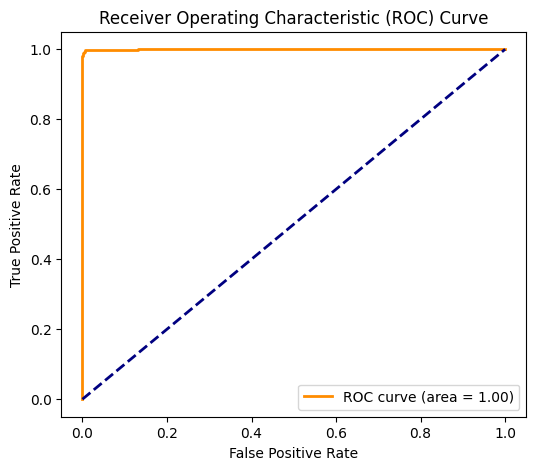

In [191]:
pred= cat.predict(X_test)               # predict function to make the prediction
acc = accuracy_score(y_test, pred)*100            # accuracy_score to geneate accuracy score
print("The accuracy is: {:.2f}".format(acc))

y_pred = cat.predict(X_test)

# Print full classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Define class labels
class_labels = ['FALSE POSITIVE', 'CONFIRMED']

# Assuming y_pred is defined
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with modified labels
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Get predicted probabilities for the positive class
y_prob = cat.predict_proba(X_test)[:, 1]


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [192]:
# Adding new model accuracy
new_row = pd.DataFrame([['CatBoostClassifier', acc]], columns=['Model', 'Accuracy'])
score = pd.concat([score, new_row], ignore_index=True)

# Display the score DataFrame
print(score)

                Model   Accuracy
0  logisticRegression  94.331984
1       XGBClassifier  99.527665
2  CatBoostClassifier  99.460189


#### Recurrent Neural Network

In [193]:
# RNN model initalization
keras.utils.set_random_seed(0)
rnn = keras.Sequential([
    layers.SimpleRNN(32, input_shape=(X_test.shape[1], 1)),
    layers.Dense(10, activation='relu'),
    layers.Dense(4, activation='sigmoid')
])
rnn.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
rnn.summary()
history = rnn.fit(X_train, y_train, epochs = 10, validation_split=0.02)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              44 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,462 (5.71 KB)

 Trainable params: 1,462 (5.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6491 - loss: 0.8019 - val_accuracy: 0.6639 - val_loss: 0.6119
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7177 - loss: 0.5582 - val_accuracy: 0.6975 - val_loss: 0.6061
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7363 - loss: 0.5439 - val_accuracy: 0.7395 - val_loss: 0.5888
Epoch 4/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7515 - loss: 0.5214 - val_accuracy: 0.7395 - val_loss: 0.5779
Epoch 5/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7733 - loss: 0.5020 - val_accuracy: 0.7479 - val_loss: 0.5678
Epoch 6/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7888 - loss: 0.4863 - val_accuracy: 0.7563 - val_loss: 0.5567
Epoch 7/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7942 - loss: 0.4760 - val_accuracy: 0.7731 - val_loss: 0.5409
Epoch 8/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8068 - loss: 0.4592 - val_accuracy: 0.

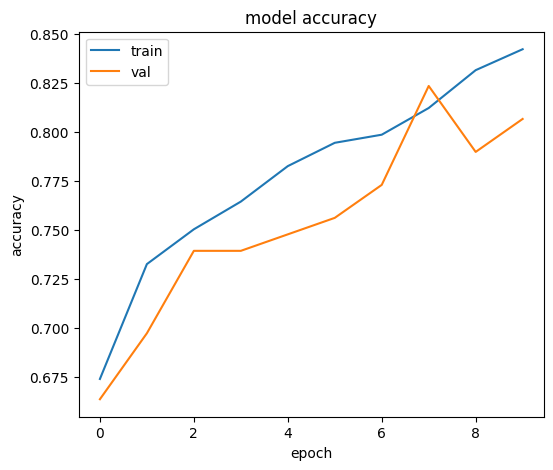

In [194]:
plt.figure(figsize=(6,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
The accuracy is: 84.68
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       958
           1       0.74      0.86      0.80       524

    accuracy                           0.85      1482
   macro avg       0.83      0.85      0.84      1482
weighted avg       0.86      0.85      0.85      1482

F1 Score: 0.8490189107374486


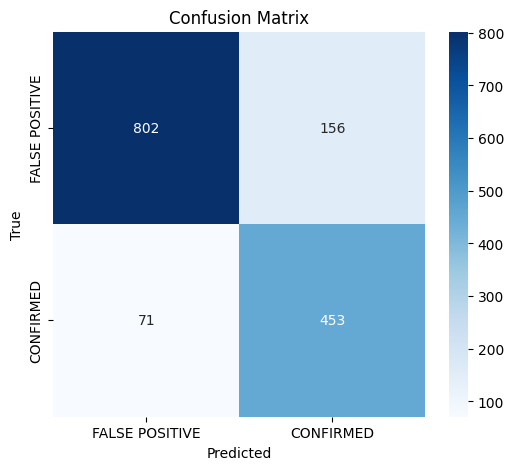

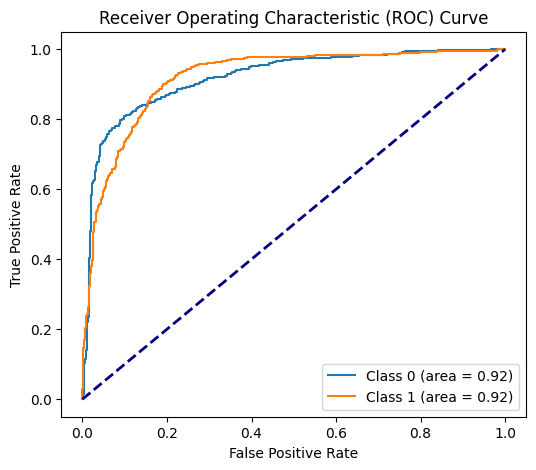

In [195]:
# Predict class labels for X_test
pred_prob = rnn.predict(X_test)
pred = np.argmax(pred_prob, axis=1)

# Calculate accuracy
acc = accuracy_score(y_test, pred) * 100
print("The accuracy is: {:.2f}".format(acc))

# Print full classification report
print("Classification Report:\n", classification_report(y_test, pred))

# Print F1 score
f1 = f1_score(y_test, pred, average='weighted')
print("F1 Score:", f1)
# Define class labels
class_labels = ['FALSE POSITIVE', 'CONFIRMED']

# Assuming y_pred is defined
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix with modified labels
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = 2  # Update number of classes as per your dataset

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, pred_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(6,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [196]:
# Adding new model accuracy
new_row = pd.DataFrame([['RNN', acc]], columns=['Model', 'Accuracy'])
score = pd.concat([score, new_row], ignore_index=True)

# Display the score DataFrame
print(score)

                Model   Accuracy
0  logisticRegression  94.331984
1       XGBClassifier  99.527665
2  CatBoostClassifier  99.460189
3                 RNN  84.682861


#### Gated Recurrent Unit

In [197]:
# GRU model initalization

gru = keras.Sequential([
    layers.GRU(32, input_shape=(X_test.shape[1], 1)),
    layers.Dense(10, activation='relu'),
    layers.Dense(4, activation='sigmoid')
])
gru.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
gru.summary()

history = gru.fit(X_train, y_train, epochs = 10, validation_split=0.02)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 32)                  │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              44 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,734 (14.59 KB)

 Trainable params: 3,734 (14.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4211 - loss: 0.9868 - val_accuracy: 0.6050 - val_loss: 0.6448
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7017 - loss: 0.5879 - val_accuracy: 0.7395 - val_loss: 0.5431
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7625 - loss: 0.5165 - val_accuracy: 0.8067 - val_loss: 0.4826
Epoch 4/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8813 - loss: 0.3154 - val_accuracy: 0.9664 - val_loss: 0.1163
Epoch 5/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9653 - loss: 0.1445 - val_accuracy: 0.6723 - val_loss: 1.0302
Epoch 6/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9578 - loss: 0.1601 - val_accuracy: 0.7815 - val_loss: 0.6719
Epoch 7/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9746 - loss: 0.1127 - val_accuracy: 0.9664 - val_loss: 0.1185
Epoch 8/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9762 - loss: 0.0963 - val_accu

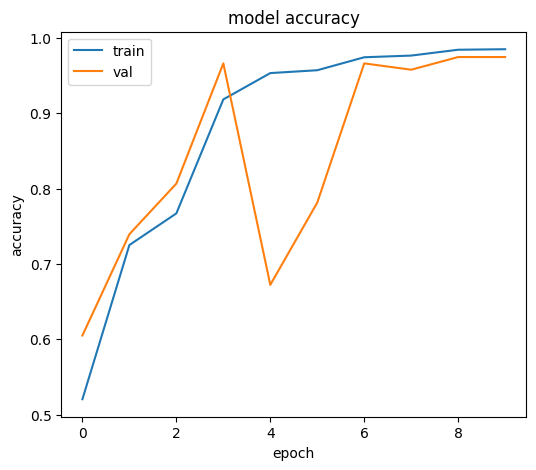

In [198]:
plt.figure(figsize=(6,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
The accuracy is: 99.19
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       958
           1       0.99      0.99      0.99       524

    accuracy                           0.99      1482
   macro avg       0.99      0.99      0.99      1482
weighted avg       0.99      0.99      0.99      1482

F1 Score: 0.9918993146031516


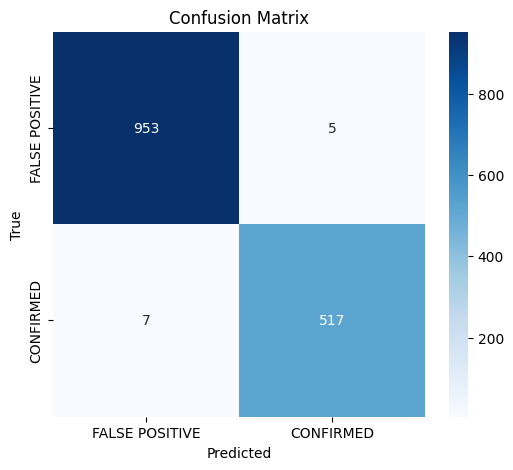

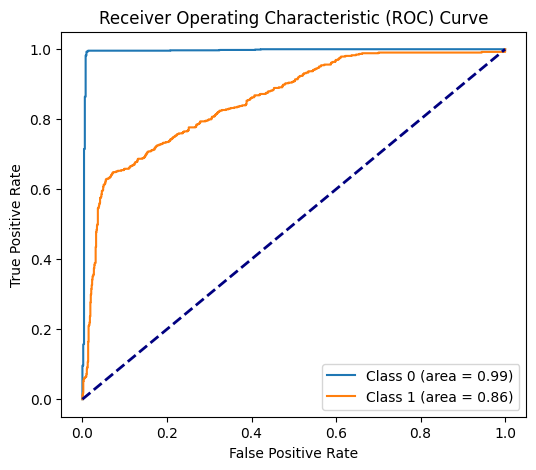

In [199]:
# Predict class labels for X_test
pred_prob = gru.predict(X_test)
pred = np.argmax(pred_prob, axis=1)

# Calculate accuracy
acc = accuracy_score(y_test, pred) * 100
print("The accuracy is: {:.2f}".format(acc))

# Print full classification report
print("Classification Report:\n", classification_report(y_test, pred))

# Print F1 score
f1 = f1_score(y_test, pred, average='weighted')
print("F1 Score:", f1)
# Define class labels
class_labels = ['FALSE POSITIVE', 'CONFIRMED']

# Assuming y_pred is defined
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix with modified labels
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = 2  # Update number of classes as per your dataset

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, pred_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(6,5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [200]:
# Adding new model accuracy
new_row = pd.DataFrame([['GRU', acc]], columns=['Model', 'Accuracy'])
score = pd.concat([score, new_row], ignore_index=True)

# Display the score DataFrame
print(score)

                Model   Accuracy
0  logisticRegression  94.331984
1       XGBClassifier  99.527665
2  CatBoostClassifier  99.460189
3                 RNN  84.682861
4                 GRU  99.190283


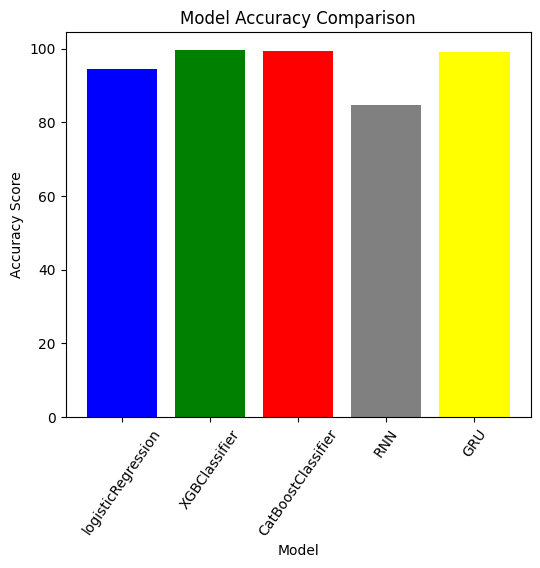

In [201]:
# Model accuracy comparison
colors = ['blue', 'green', 'red','gray','yellow']

plt.figure(figsize=(6, 5))
plt.bar(score['Model'], score['Accuracy'], color=colors)
plt.xticks(rotation=55)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')

plt.show()